<center><font size="+4">Lecture 7: Course closing and</font></center>
<center><font size="+4"> Advanced Libraries for</font></center>
<center><font size="+4">data manipulation/visualization</font></center>
<center><font size="+4">Overview of NumPy & Pandas</font></center>

---

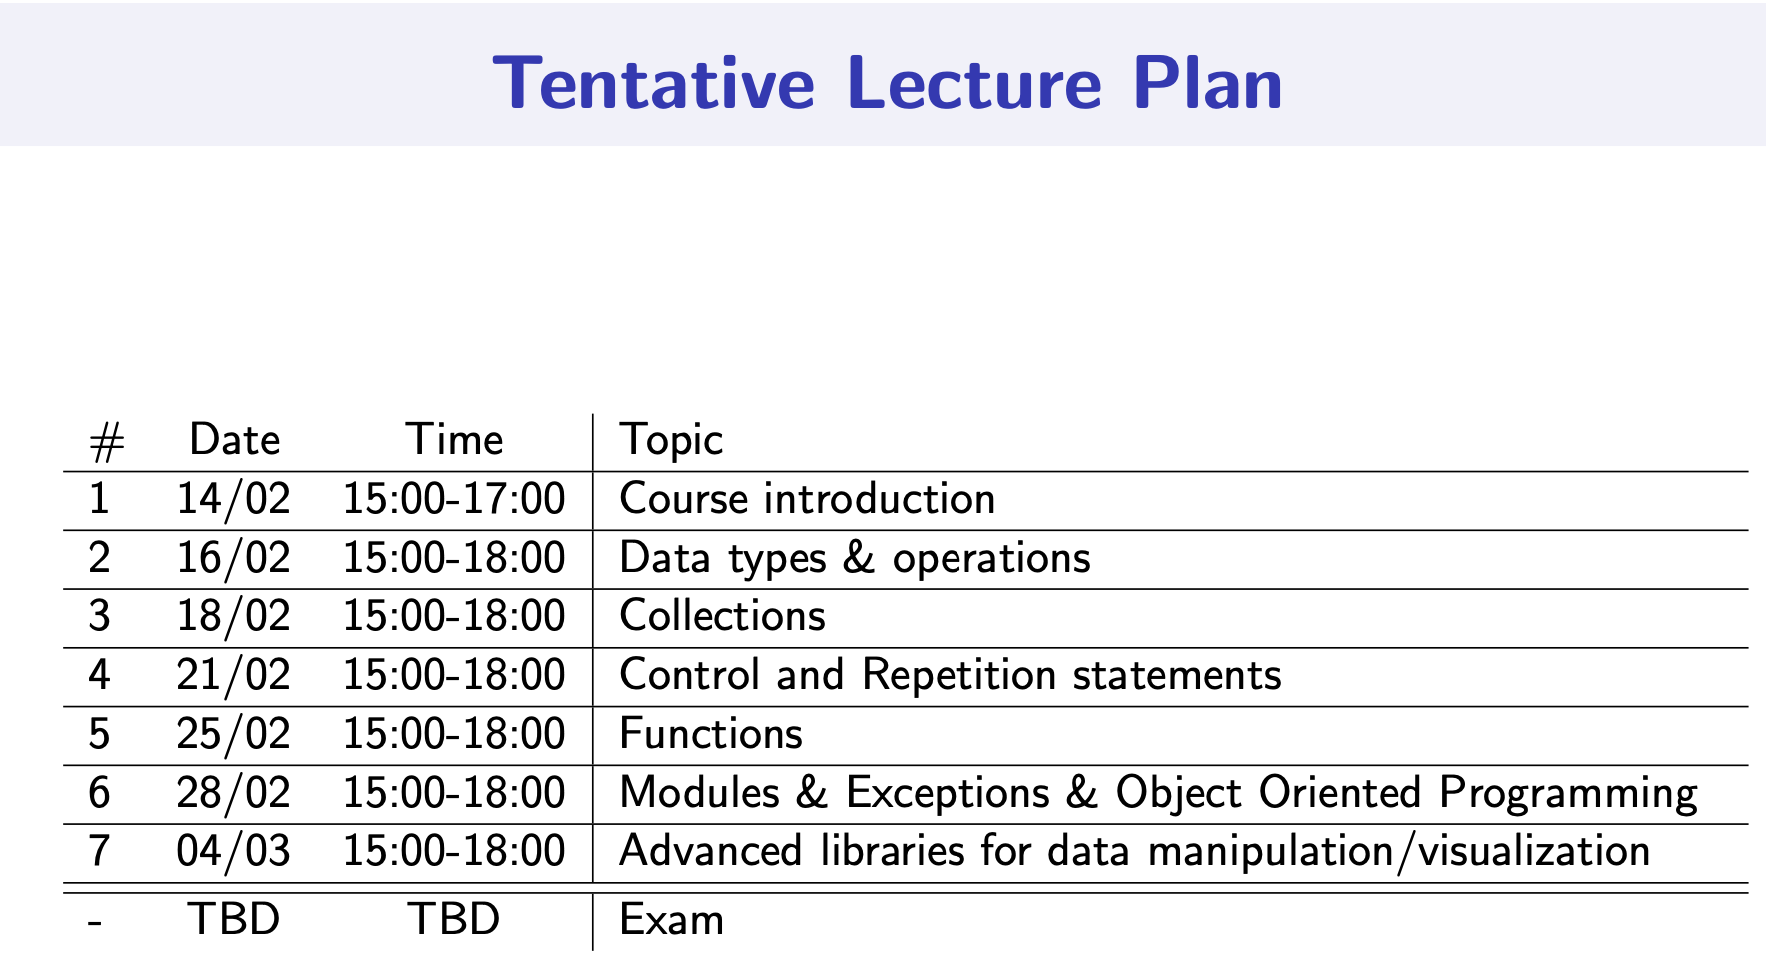

In [2]:
from IPython.display import Image, display
url_github_repo="https://github.com/EMbeDS-education/StatsAndComputing20212022/raw/main/PDA/"
img=Image(url_github_repo+'jupyter/jupyterNotebooks/images/tentativeLecturePlan.png',width=700)
display(img)

<center><font size="+4">Lecture Plan</font></center>

| Class | Date | Time | Topic |
|:----------:|-----------------------------|--|--|
|1| 14/02 | 15:00-17:00 | Course introduction |
|2| 16/02 | 15:00-18:00 | Data types & operations |
|3| 18/02 | 15:00-18:00 | Collections & First taste of plots |
|4| 21/02 | 15:00-18:00 | Control statements (if, loops) & CSV manipulation/visualization on COVID-19 data | 
|5| 25/02 | 15:00-18:00 | Functions & Applications to analysis of epidemiological models & to Generation of WordClouds from online news |
|6| 28/02 | 15:00-18:00 | Modules & Exceptions & OOP & Applications to betting markets (ABM models) |
|7| 04/03 | 15:00-18:00 | Advanced libraries for data manipulation (NumPy, Pandas) & Application to COVID-19 and Finance data |

> Note: we created this table using Markdown. <br/>
> [There are also online table generators](https://www.tablesgenerator.com/markdown_tables)

# Notes and references about this class

## The role of this class in the course

So far we focused on 
* How to program 
  * _Well_
  * Using the built-in Python data structures and functionalities
  * We have also seen some __best practices__ to follow when using python
    - Take a look at [this page](https://realpython.com/python-pep8/) for further __best practices__
* Applying the studied topics in 
  * simple assignments and 
  * in more advanced applications seen in class
    * Class 3: A first taste of plots
    * Class 4: Load, process and plot official Italian COVID19 data
    * Class 5: Load, process and plot simulated data from epidemiological SIR models
    * Class 5: Creation of word clouds for online news related to a given topic
    * Class 6: Creation and analysis of economical Agent-based models using OOP

The idea is that
  * Before knowing how to use advanced Python features, you need to know 
    - how to program
    - how to program in Python    
  * This is a more organic learning approach than showing how to solve specific tasks A or B
    * in the future you will have to learn how to solve new specific tasks... 
  * Now you have the necessary background to learn 
    - how to use __advanced libraries__ (to get more efficiency and/or to consider bigger problems)
        * Often it is just a matter of changing the command used, but the logics stays the same
        * __See you at M2 where we will unleash the power of Python!__
    - new programming languages

__Today we will give an overview of advanced Python libraries for data processing.__
* Of course, we won't be able to fully present you these libraries in a few hours
  * We want to pass you the message: 'certain tasks can be done more easily/efficiently using specific libraries'
  * You can see this notebook as a first place to look at if you will need to use such libraries in the future.
    * It also contains examples and references to further material
  * __This will not be part of the exam__

__On the 14th of March__ will start __PDA Module 2__
  * 20 hours
  * We will start from here, and will present you the main steps in __Machine Learning__ pipelines
    * with focus on pre-processing of data
  * In case you are interested, consider attending it now or in the coming years

## What is this class about

This notebook is mainly based on Chapter 4 of the following book:
* [Python for Data Analysis, 2nd edition, William Wesley McKinney (O’Reilly)](https://www.oreilly.com/library/view/python-for-data/9781491957653/)
* [Freely available Jupyter notebooks covering the examples/material of each chapter](https://github.com/wesm/pydata-book)
* Some pictures have been taken from these sources

In particular, this notebook introduces the libraries:
* [NumPy](https://numpy.org/): for scientific computing
* [Pandas](https://pandas.pydata.org/): 
   * for working with structured data (CSV, Spreadsheets, Databases)
   * for creating advanced plots

> Note: in this notebook we will often refer interchangeably to _arrays_, _NumPy arrays_ or just _ndarrays_. 
<br/>
> You can think of __arrays as lists with better performances__ for numerical computing

---

# NumPy
NumPy, _Numerical Python_, is the Python package for __scientific computing__

It provides:
* An efficient implementation for list-like multidimensional data structures named __NumPy arrays__ or __ndarray__
  * including functions for performing
    * element-wise computations on arrays 
    * mathematical operations between arrays
* Tools for reading/writing datasets from/to disk and arrays
* Linear algebra operations, Fourier transform, and random number generation
* 1-line plotting functionalities
* Tools for integrating C, C++, and Fortran code with Python
  * Useful to use legacy code
  * Useful to use very efficient and established libraries for scientifical computation


NumPy arrays are a more efficient way of storing and manipulating data than the other built-in Python data structures.

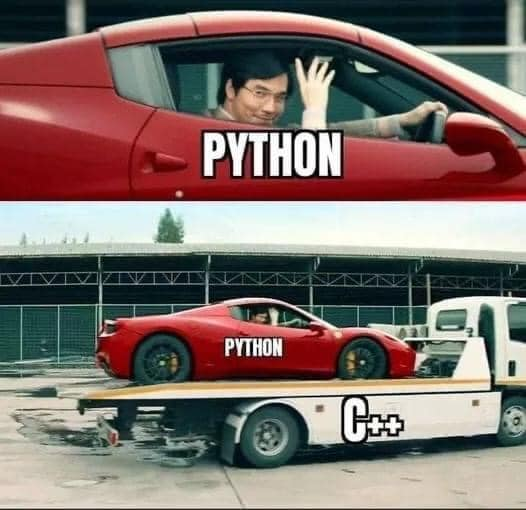

In [5]:
from IPython.display import Image, display
url_github_repo="https://github.com/EMbeDS-education/StatsAndComputing20212022/raw/main/PDA/"
img=Image(url_github_repo+'jupyter/jupyterNotebooks/images/pythoncpp.jpg',width=500)
display(img)

## Install and import the NumPy module
The first time you run this notebook you might have to install numpyPandas using the following script:

In [6]:
#%pip install --upgrade pip
%pip install numpy

#import sys
#!"{sys.executable}" -m pip install --upgrade pip
#!"{sys.executable}" -m pip install numpy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.6/17.6 MB 10.0 MB/s eta 0:00:0000:0100:01
Note: you may need to restart the kernel to use updated packages.


After installing a module (only once), you should import it (everytime)
- The Python community has adopted a number of __naming conventions__ for commonly used modules:
* Below you see the conventions for numpy, pandas and matplotlib

In [7]:
import numpy as np
# import pandas as pd 
# import matplotlib.pyplot as plt

* This means that when you see `np.arange(4)`, we refer to `numpy.arange(4)`, the `arange` function in NumPy.

## Main features: Arrays, Vectorized Computation, Broadcast

Numpy provides:
* __ndarray__, a multidimensional array providing **vectorized arithmetic** operations and **broadcasting** capabilities
   * Vectorized arithmetic operations: 
     - Operations on arrays are done 
       - element-wise iterating over the elements of the arrays 
       - _at C level rather than at Python level_, obtaining better performances. 
     - We get a concise syntax
   * [Broadcasting](https://numpy.org/doc/stable/user/basics.broadcasting.html): 
     - In general, operations on arrays should be done on arrays with same _dimensions_
     - In certain cases, operations on arrays can be done even if they do not have same dimensions. Pyhton tries to guess what to do
     - E.g., if you multiply an array by a constant, each entry of the arrays is multiplied by the constant
       - the constant is `broadcasted` on each entry of the array
     - No data is 'needlessly' copied, and the _iterations to broadcast_  are done at C level, obtaining better performances
* Standard mathematical functions for applying operations on entire arrays without having to write loops
  - Again, these guarantee C-level performances

## The NumPy ndarray: A Multidimensional Array

### Performance comparison Numpy ndarrays vs Python lists

In [8]:
l=[1,2,3]
l

[1, 2, 3]

Let's create a ndarray and a built-in Python list, each with 5mln elements.

In [9]:
import numpy as np
np_arr = np.arange(5000000) #5 mln
py_list = list(range(5000000)) #5 mln

print('np_arr has type',type(np_arr))
print('py_list has type',type(py_list))
np_arr
#py_list

np_arr has type <class 'numpy.ndarray'>
py_list has type <class 'list'>


array([      0,       1,       2, ..., 4999997, 4999998, 4999999])

Let's compute the square value of each element in the array/list

In [10]:
 print("Test NumPy Array")
 %time np_arr_power = np_arr ** 2

 print("\nTest Python list comprehension")
 %time py_list = [x ** 2 for x in py_list]

 print("\nTest Python list iteration")
 %time for i in range(len(py_list)): py_list[i]=py_list[i]**2

 print("\nTests completed")

Test NumPy Array
CPU times: user 7.99 ms, sys: 9.32 ms, total: 17.3 ms
Wall time: 16.6 ms

Test Python list comprehension
CPU times: user 1.28 s, sys: 59.9 ms, total: 1.34 s
Wall time: 1.34 s

Test Python list iteration
CPU times: user 1.84 s, sys: 38.1 ms, total: 1.88 s
Wall time: 1.89 s

Tests completed


### What is an ndarray?

NumPy arrays are named **nd**array because they are **n**-**d**imensional arrays

In [11]:
#We have already imported numpy in a cell above
#import numpy as np

# Generate a 2x3 matrix with random data in the interval [0,1)
data = np.random.rand(2, 3)
data

array([[0.65937039, 0.39763225, 0.63752844],
       [0.13865929, 0.28716239, 0.35511301]])

Arrays enable you to perform
mathematical operations on each of their elements 
* using a syntax similar to the equivalent operations between (scalar) numbers

Below we 
* multiply by 10 **each value** in `data`
* double **each value** in `data`

In [12]:
data * 10

array([[6.59370389, 3.97632253, 6.37528444],
       [1.38659287, 2.87162392, 3.5511301 ]])

In [13]:
data + data

array([[1.31874078, 0.79526451, 1.27505689],
       [0.27731857, 0.57432478, 0.71022602]])

A difference between Python lists and arrays
* lists can contain elements of **different type**
* arrays have to contain only elements of **same type**

Every array has 
* a`shape`, a tuple indicating the size of each dimension, 
  * `data.shape` is `(2,3)` because it has dimension 2x3
* a `dtype`, an object describing the type of the data in the array
  * `data.dtype` is `float64` because it contains floating point numbers (reals)
  *  Note that `float64` is a [data type defined in NumPy](https://numpy.org/doc/stable/user/basics.types.html). _More on this later_

In [14]:
print(data.shape)
print(data.dtype)

(2, 3)
float64


### Creating ndarrays
The easiest way to create an array is to use the `array` function. 
* This will produce a new array containing the provided data

In [15]:
data1 = [6, 7.5, 8, 0, 1]
print(data1)
arr1 = np.array(data1)
print(arr1)
print(arr1.shape)
print(arr1.dtype)

[6, 7.5, 8, 0, 1]
[6.  7.5 8.  0.  1. ]
(5,)
float64


__Why do we get `6.` and not `6`?__

List of lists, e.g. representing a matrix,
* can be converted into a multidimensional array 
* if internal lists have same length

In [16]:
data2 = [[1, 2, 3, 4], [5, 6, 7, 8]]
print('data2\n',data2)
arr2 = np.array(data2)
print('arr2\n',arr2)
print(arr2.shape)
print(arr2.dtype)

data2
 [[1, 2, 3, 4], [5, 6, 7, 8]]
arr2
 [[1 2 3 4]
 [5 6 7 8]]
(2, 4)
int64


Further functions for creating new arrays:
* `zeros` and `ones` create arrays of 0’s or 1’s, respectively, with a given length or shape.
* To create a higher dimensional array with these methods, pass a tuple for the shape:

In [17]:
print('np.zeros(10) =', np.zeros(10))
print('np.ones((3, 6)) =\n', np.ones((3, 6)))

np.zeros(10) = [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
np.ones((3, 6)) =
 [[1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1.]]


`arange` is an array-valued version of the built-in Python `range` function:
* It allows to represent an open interval [start,stop,step)
    - where only stop is mandatory
    - `stop` does not belong to the range
* Beware: 
  - `range` is an iterator that creates elements on demand
  - `arange` fully creates the array allocating all the necessary space
     - while python's `range` does not occupy much space

In [18]:
print(np.arange(15))  #if you want integers
print(np.arange(15.)) #if you want reals
print(type(np.arange(15)))

print(range(15))
print(type(range(15)))

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14]
[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14.]
<class 'numpy.ndarray'>
range(0, 15)
<class 'range'>


In [19]:
np.arange(10,20,2)

array([10, 12, 14, 16, 18])

### Data Types for ndarrays
The names of the numerical dtypes follow this convention: 
* A type name, like `float` or `int`, followed by the number of bits used to represent an element of this type.
* The higher is this number of bits, 
  * the higher precision (or the larger interval) you can use to store your data (GOOD)
  * the more memory is required to store your data (BAD)

For example, 
* a double-precision floating point value takes 64 bits (`float64`)
* an integer might take 32 (`int32`) or 64 bits (`int64`)
  * in the latter case being able to represent a larger interval of integers, but using up more space

In [20]:
arr1 = np.array([1, 2, 3], dtype=np.float64)
print(arr1)
arr2 = np.array([1.1, 2.1, 3.1], dtype=np.int32)
print(arr2)
print(arr1.dtype)
print(arr2.dtype)

[1. 2. 3.]
[1 2 3]
float64
int32


You can explicitly convert or cast an array from one dtype to another using ndarray’s `astype` method
* This will create a `copy` of the original array, where elements have the new type

In [21]:
arr = np.array([1.1, 2.1, 3.1, 4.1, 5.1])
print(arr)
print('Before',arr.dtype,'\n')
int_arr = arr.astype(np.int32)
print(int_arr)
print('After ',int_arr.dtype)

[1.1 2.1 3.1 4.1 5.1]
Before float64 

[1 2 3 4 5]
After  int32


### Vectorized Arithmetics with NumPy Arrays

Once you have values in an array
* You can easily apply operations on each of its elements
  * Arithmetic operations between equal-size arrays are applied element-wise
  * Arithmetic operations between an array and a scalar (a number):
    * the operation is applied between each array element and the scalar
    * the scalar is said to be _broadcasted_ to all the array elements
* Similarly to list comprehensions, this does not require loops,
  * Note: as shown above, vectorized arithmetics is more efficient than the corresponding list comprehension operation (even more if compared to loops)

In [22]:
a = np.array([[1., 2., 3.], [4., 5., 6.]])
print('a = \n',a, '\n')
print('a * a = \n', a * a, '\n')
print('a - a = \n', a - a, '\n')
print('1 / a = \n', 1 / a, '\n')
print('a*0.5  \n=', a*0.5, '\n')
print('a**0.5  \n=', a**0.5, '\n')

a = 
 [[1. 2. 3.]
 [4. 5. 6.]] 

a * a = 
 [[ 1.  4.  9.]
 [16. 25. 36.]] 

a - a = 
 [[0. 0. 0.]
 [0. 0. 0.]] 

1 / a = 
 [[1.         0.5        0.33333333]
 [0.25       0.2        0.16666667]] 

a*0.5  
= [[0.5 1.  1.5]
 [2.  2.5 3. ]] 

a**0.5  
= [[1.         1.41421356 1.73205081]
 [2.         2.23606798 2.44948974]] 



> Note that with `a * a` we do not compute the product of 2 matrices. 
> - We multiply them element-wise

### Basic Indexing and Slicing

#### Indexing and slicing 1-dimensional arrays

Arrays have `indexing` and `slicing` capabilities of lists

In [23]:
arr = np.arange(10)
print('arr',arr)
print('You can indexsingle entries:\narr[0] is',arr[0])
print('arr[5] is',arr[5])

arr [0 1 2 3 4 5 6 7 8 9]
You can indexsingle entries:
arr[0] is 0
arr[5] is 5


In [24]:
print('arr\n',arr)
print('You can create slices:')
print('arr[:8]  is\n',arr[:8])
print('arr[5:]  is\n          ',arr[5:])
print('arr[5:8] is\n          ',arr[5:8])
view58=arr[5:8]
view58

arr
 [0 1 2 3 4 5 6 7 8 9]
You can create slices:
arr[:8]  is
 [0 1 2 3 4 5 6 7]
arr[5:]  is
           [5 6 7 8 9]
arr[5:8] is
           [5 6 7]


array([5, 6, 7])

A slice is a sort of `view` of the array
* You can assign it to a variable
* You can change its values
  - The original array is changed as well!
* **Beware**: no data is copied

In [25]:
arr[5:8] = 12
print('After arr[5:8] = 12 arr is\n',arr)

After arr[5:8] = 12 arr is
 [ 0  1  2  3  4 12 12 12  8  9]


Note: 
* if you assign a scalar value to a __slice__ (a selection of some elements in an array)
  * as in `arr[5:8] = 12`
* then the value is propagated (or, again, _broadcasted_) to each selected element 

If you are familiar with Python lists you might have noticed an important difference
* When slicing a list, you actually create a copy 
* **Array slices are views on the original array**.
* The __data in a slice is not copied__
  * this is more efficient
  * and any modifications to the view will be reflected in the source array
  
Let's see another example  

In [26]:
print('source array', arr)
arr_slice = arr[5:8]
print('slice array', arr_slice)

source array [ 0  1  2  3  4 12 12 12  8  9]
slice array [12 12 12]


In [27]:
arr_slice[1] = 12345
print('source array (after arr_slice[1] = 12345):\n', arr)

source array (after arr_slice[1] = 12345):
 [    0     1     2     3     4    12 12345    12     8     9]


If you want a `copy of a slice of an ndarray` instead of a view, you will need to `explicitly copy` the array; 
* `arr2 = arr[5:8].copy()`

#### Indexing and slicing higher-dimensional arrays

With higher dimensional arrays, you have many more options. 
* A two-dimensional array is actually an array of arrays
  * Each entry of the _outer_ array contains an _inner_ array

In [28]:
arr2d = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
arr2d

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

In [29]:
arr1d=arr2d[0]
arr1d

array([1, 2, 3])

In [30]:
arr1d[2]

3

As for multidimensional lists, you can access single elements of inner arrays using nested `[]`
* `arr2d[0][2]` is `3`, the third element (index `2`) of the first inner array (index `0`)
* Alternatively, you can do `arr2d[0,2]`

In [31]:
print(arr2d)
print(arr2d[0][2])
print(arr2d[0, 2])

[[1 2 3]
 [4 5 6]
 [7 8 9]]
3
3


**See figure below for an illustration of indexing a 2D array** <br />
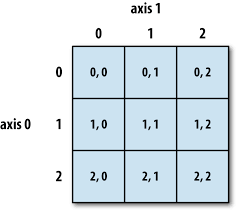

This is an example for 2-dimensional arrays
* It works similarly for higher dimensions...

**BEWARE**
- When __indexing__, it does not make a difference whether you use
  - `arr2d[0][2]` or `arr2d[0, 2]`
- When __silicing__, it makes a **big difference** whether you use
  - `arr2d[:2,1:]` or `arr2d[:2][1:]`
  - Typically what you want to do is `arr2d[:2,1:]`

For `arr2d[:2,1:]`
- we first select the rows 0 and 1 `[1,2,3],[4,5,6]`
- from these, we select column 1 and 2 `[2,3],[5,6]`

In [32]:
print(arr2d[:2,1:])
arr2d[:2,1:].shape

[[2 3]
 [5 6]]


(2, 2)

For `arr2d[:2][1:]`
- we first select the rows 0 and 1 `[1,2,3],[4,5,6]`
- we select row 1 `[4, 5, 6]`

In [33]:
print(arr2d[:2])
print()
print(arr2d[:2][1:])
arr2d[:2][1:].shape

[[1 2 3]
 [4 5 6]]

[[4 5 6]]


(1, 3)

Further examples of indexing/slicing of higher dimensional arrays

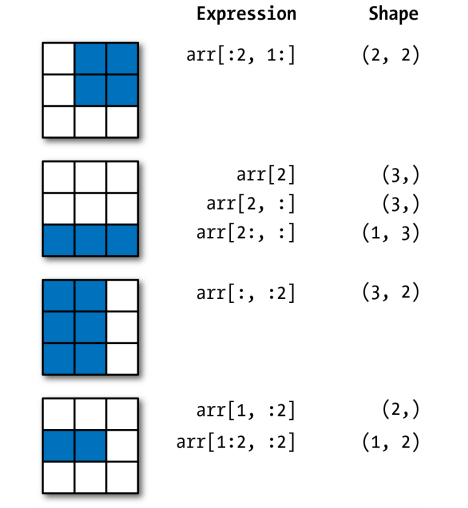

In [34]:
print(arr2d)
print()
print(arr2d[:2])

[[1 2 3]
 [4 5 6]
 [7 8 9]]

[[1 2 3]
 [4 5 6]]


We have sliced it along axis 0, the first axis (the rows). 
* A slice, therefore, selects a range of elements along an axis. 
* You can pass multiple slices just like you can pass multiple indexes

In [31]:
arr2d[:2, 1:]

array([[2, 3],
       [5, 6]])

Assigning to a slice expression assigns to the whole selection by broadcasting

In [32]:
arr2d[:2, 1:] = 0 
arr2d

array([[1, 0, 0],
       [4, 0, 0],
       [7, 8, 9]])

### Select entries that satisfy a guard

We can also use a Boolean expression to select elements in an array
* we select the ones satisfying the Boolean expression

In [35]:
data = np.random.randn(7, 4)
print('Data\n',data)

Data
 [[ 0.11272189 -0.13345679  1.85039433  0.29348643]
 [ 0.08291147  0.98948379  0.72981341  1.13971934]
 [ 0.59840957  0.17389647 -1.06709895 -0.40515963]
 [ 0.47345666 -0.76354461  0.01892841 -0.65170548]
 [-0.4925853   0.13633198  2.2116877  -0.32886976]
 [-0.12045553  0.91940399 -0.69422516  0.50384961]
 [ 0.04859821 -2.08679043 -0.55114861  2.17751034]]


We first see how to create a _mask_

In [36]:
data > 0

array([[ True, False,  True,  True],
       [ True,  True,  True,  True],
       [ True,  True, False, False],
       [ True, False,  True, False],
       [False,  True,  True, False],
       [False,  True, False,  True],
       [ True, False, False,  True]])

Now we use the mask to access the entries of interest

In [37]:
data2=data[ data > 0 ]
print('Data2\n',data2)
data2.shape

Data2
 [0.11272189 1.85039433 0.29348643 0.08291147 0.98948379 0.72981341
 1.13971934 0.59840957 0.17389647 0.47345666 0.01892841 0.13633198
 2.2116877  0.91940399 0.50384961 0.04859821 2.17751034]


(17,)

> This will actually _copy_ your data
> - You get a __new 1-dimensional array__ containing the elements matching the condition

In [38]:
data2[0]=100
data

array([[ 0.11272189, -0.13345679,  1.85039433,  0.29348643],
       [ 0.08291147,  0.98948379,  0.72981341,  1.13971934],
       [ 0.59840957,  0.17389647, -1.06709895, -0.40515963],
       [ 0.47345666, -0.76354461,  0.01892841, -0.65170548],
       [-0.4925853 ,  0.13633198,  2.2116877 , -0.32886976],
       [-0.12045553,  0.91940399, -0.69422516,  0.50384961],
       [ 0.04859821, -2.08679043, -0.55114861,  2.17751034]])

How can I get elements within an interval?
- Or, in general, that satisfy a complex condition?

In [39]:
(data > 0) & (data < 0.5)

array([[ True, False, False,  True],
       [ True, False, False, False],
       [False,  True, False, False],
       [ True, False,  True, False],
       [False,  True, False, False],
       [False, False, False, False],
       [ True, False, False, False]])

In [40]:
data3=data[ (data > 0) & (data < 0.5) ]
print('Data3\n',data3)
data3.shape

Data3
 [0.11272189 0.29348643 0.08291147 0.17389647 0.47345666 0.01892841
 0.13633198 0.04859821]


(8,)

## Mathematical and Statistical Methods
Arrays have a number of methods for 
* computing mathematical functions/statistics 
  * on the entire array 
  * on part of the array

### Reshaping an array

Arrays have a convenient method `reshape` to 
* change their dimensions without modifying the data
* Also in this case we compute views. 
  * **no data is actually copied**
  * any change to the view is observed also in the orginal data

For example, we can transform
* a 1-dimensional array with 15 entries
* into a 2-dimensional 3x5 array (a matrix)

In [41]:
arr = np.arange(15)
print("1-dimensional array arr\n",arr)
m=arr.reshape((3, 5))
print("2-dimensional matrix m\n",m)

print()
#m is a view!
m[0,0]=100
print("1-dimensional array arr after modifiyng the view m\n",arr)
print("2-dimensional matrix m after modifiyng the view m\n",m)

1-dimensional array arr
 [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14]
2-dimensional matrix m
 [[ 0  1  2  3  4]
 [ 5  6  7  8  9]
 [10 11 12 13 14]]

1-dimensional array arr after modifiyng the view m
 [100   1   2   3   4   5   6   7   8   9  10  11  12  13  14]
2-dimensional matrix m after modifiyng the view m
 [[100   1   2   3   4]
 [  5   6   7   8   9]
 [ 10  11  12  13  14]]


### Transposing Arrays
Arrays have the transpose method and also the special `T` attribute
* This is just a special reshape
* we compute a view - no actual copy

In [42]:
arr = np.arange(15)
m = arr.reshape(3,5)
print("Matrix m\n",m)
print()
print("Transposed matrix using T\n",m.T)
print()
print("Transposed matrix transpose()\n",m.transpose())

Matrix m
 [[ 0  1  2  3  4]
 [ 5  6  7  8  9]
 [10 11 12 13 14]]

Transposed matrix using T
 [[ 0  5 10]
 [ 1  6 11]
 [ 2  7 12]
 [ 3  8 13]
 [ 4  9 14]]

Transposed matrix transpose()
 [[ 0  5 10]
 [ 1  6 11]
 [ 2  7 12]
 [ 3  8 13]
 [ 4  9 14]]


When invoked on a matrix, they both give the transpose of such matrix
- See animation from [wikipedia](https://en.wikipedia.org/wiki/Transpose)

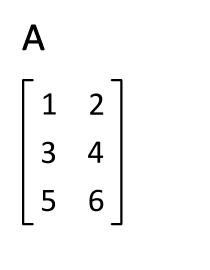

In [43]:
from IPython.display import Image
Image("https://upload.wikimedia.org/wikipedia/commons/e/e4/Matrix_transpose.gif")

In addition, `transpose` can be invoked on arrays of any dimensions [to permute such dimensions](https://numpy.org/devdocs/reference/generated/numpy.transpose.html#numpy.transpose)
- reversing them by default
- or providing the new order for dimensions in input

In [44]:
x = np.ones((2, 3, 4))
print(x)
print('\nThe 3-D matrix has shape \n',x.shape)
print('Shape of x.transpose()\n',x.transpose().shape)
print('Shape of x.transpose(0,2,1)\n',x.transpose(0,2,1).shape)

[[[1. 1. 1. 1.]
  [1. 1. 1. 1.]
  [1. 1. 1. 1.]]

 [[1. 1. 1. 1.]
  [1. 1. 1. 1.]
  [1. 1. 1. 1.]]]

The 3-D matrix has shape 
 (2, 3, 4)
Shape of x.transpose()
 (4, 3, 2)
Shape of x.transpose(0,2,1)
 (2, 4, 3)


### Matrix product
If you want to [multply two matrices](https://en.wikipedia.org/wiki/Matrix_multiplication) you can use the `dot` method
* not just multiplying element-wise their elements
* but the classic row-column multiplication of matrixes

In [45]:
m1 = np.arange(4).reshape(2,2)
m2 = (np.arange(4)+4).reshape(2,2)
#np.dot(m.T,m)
print('m1\n',m1)
print('m2\n',m2)
print('m1.dot(m2)\n',m1.dot(m2))
print('Same as np.dot(m1,m2)\n',np.dot(m1,m2))

m1
 [[0 1]
 [2 3]]
m2
 [[4 5]
 [6 7]]
m1.dot(m2)
 [[ 6  7]
 [26 31]]
Same as np.dot(m1,m2)
 [[ 6  7]
 [26 31]]


In [46]:
m1 = np.arange(4).reshape(2,2)
m1

array([[0, 1],
       [2, 3]])

In [47]:
m2 = (np.arange(4)+4).reshape(2,2)
m2

array([[4, 5],
       [6, 7]])

### Square root
_np.sqrt()_ computes the square root of each element. Equivalent to m1 ** 0.5

In [48]:
print(np.sqrt(m1))
print(m1 ** 0.5)

[[0.         1.        ]
 [1.41421356 1.73205081]]
[[0.         1.        ]
 [1.41421356 1.73205081]]


### Aggregations
Aggregations (often called reductions) 
* like sum, mean, and standard deviation std of all elements in the matrix/array 
* can be computed by using the corresponding array method

In [49]:
print('matrix\n',m)
print('mean',m.mean())
print('sum',m.sum())
print('standard deviation',m.std())

print()
print('array\n',arr)
print('mean',arr.mean())
print('sum',arr.sum())
print('standard deviation',arr.std())

matrix
 [[ 0  1  2  3  4]
 [ 5  6  7  8  9]
 [10 11 12 13 14]]
mean 7.0
sum 105
standard deviation 4.320493798938574

array
 [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14]
mean 7.0
sum 105
standard deviation 4.320493798938574


Functions like `sum`  and `mean`
* can be computed for each dimension rather than cumulatively 
* we do this specifying the `axis` (the dimension) over which we want to iterate

For example, using 
* `axis=0` we compute the sum/mean/std for each column of M
* `axis=1` we compute the sum/mean/std for each row of M

In [50]:
print('matrix\n',m)
print()

print('sum of each column\n',m.sum(axis=0))
print('mean of each column\n',m.mean(axis=0))
print('standard deviation of each column\n',m.std(axis=0))
print()

print('sum of each row\n',m.sum(axis=1))
print('mean of each row\n',m.mean(axis=1))
print('standard deviation of each row\n',m.std(axis=1))

matrix
 [[ 0  1  2  3  4]
 [ 5  6  7  8  9]
 [10 11 12 13 14]]

sum of each column
 [15 18 21 24 27]
mean of each column
 [5. 6. 7. 8. 9.]
standard deviation of each column
 [4.0824829 4.0824829 4.0824829 4.0824829 4.0824829]

sum of each row
 [10 35 60]
mean of each row
 [ 2.  7. 12.]
standard deviation of each row
 [1.41421356 1.41421356 1.41421356]


### Sorting
Similarly to lists, 
* arrays can be sorted using the `sort()` method

In [51]:
#Sample from the normal distribution
arr = np.random.randn(8)
arr

array([ 0.83721473, -0.5392051 , -0.02462193,  0.9348727 ,  1.31714047,
       -0.32310369,  0.47740442,  0.56087164])

In [52]:
arr.sort()
arr

array([-0.5392051 , -0.32310369, -0.02462193,  0.47740442,  0.56087164,
        0.83721473,  0.9348727 ,  1.31714047])

Multidimensional arrays are sorted for one chosen dimension
E.g. in matrices we can
* Sort across rows
* Sort across columns

In [53]:
arr2d = np.random.randn(5, 3)
arr2d_cp0 = arr2d.copy()
arr2d_cp1 = arr2d.copy()

print('Original')
print(arr2d)

print('\n`sort(0)`: Sort the elements within each column (sort across rows)')
arr2d_cp0.sort(axis=0)
print('arr2d.sort(0)')
print(arr2d_cp0)

print('\n`sort(1)`: Sort the elements within each row (sort across columns)')
arr2d_cp1.sort(1)
print('arr2d.sort(1)')
print(arr2d_cp1)

print('\n`sort( )`: Sorts across last axis  ( sort(1), sort across columns)')
arr2d.sort()
print('arr2d.sort()')
print(arr2d)

Original
[[ 0.1277572   1.45711916  0.65004684]
 [-0.96588411  0.67557399  0.18471188]
 [ 2.46938569  0.19486748 -1.0089458 ]
 [ 1.17095521  0.6529984  -0.18112781]
 [-0.5949352  -1.28998733  1.62986378]]

`sort(0)`: Sort the elements within each column (sort across rows)
arr2d.sort(0)
[[-0.96588411 -1.28998733 -1.0089458 ]
 [-0.5949352   0.19486748 -0.18112781]
 [ 0.1277572   0.6529984   0.18471188]
 [ 1.17095521  0.67557399  0.65004684]
 [ 2.46938569  1.45711916  1.62986378]]

`sort(1)`: Sort the elements within each row (sort across columns)
arr2d.sort(1)
[[ 0.1277572   0.65004684  1.45711916]
 [-0.96588411  0.18471188  0.67557399]
 [-1.0089458   0.19486748  2.46938569]
 [-0.18112781  0.6529984   1.17095521]
 [-1.28998733 -0.5949352   1.62986378]]

`sort( )`: Sorts across last axis  ( sort(1), sort across columns)
arr2d.sort()
[[ 0.1277572   0.65004684  1.45711916]
 [-0.96588411  0.18471188  0.67557399]
 [-1.0089458   0.19486748  2.46938569]
 [-0.18112781  0.6529984   1.17095521]
 [

### Unique
NumPy has some basic set operations for 1-dimensional ndarrays. 
* The most common one is `np.unique()` 
  * returns the sorted unique values in an array

In [54]:
names = np.array(['Bob', 'Will', 'Bob', 'Will', 'Joe', 'Joe'])
print(np.unique(names))

# pure Python alternative:
# sorted(set(names))

['Bob' 'Joe' 'Will']


## Logic functions 
- See also [here](https://numpy.org/doc/stable/reference/routines.logic.html)

We have seen how conditions can be checked on all elements in an array
- obtaining an array of same dimensions containing 
  - `True` for the elements satisfying the condition
  - `False` for the elements not satisfying the condition  

In [53]:
data = np.random.randn(7, 4)
data

array([[-1.4629287 ,  0.12309375,  0.82025156,  1.10074114],
       [-0.36267334,  0.21080605, -0.4892883 , -0.09427166],
       [-0.62942486,  1.0334227 ,  0.19733068,  0.78362149],
       [-0.39473137, -1.4726935 , -0.80466133, -0.91972684],
       [-0.64489092,  0.17905599, -0.31744233,  0.76844581],
       [ 0.60666844, -0.04109427, -0.7367578 , -0.1819558 ],
       [-0.81502675, -0.72261342,  0.49602198, -0.83669662]])

What numbers are greater than 0?

In [54]:
mask = data > 0
print(mask.dtype)
print(mask.shape)
mask

bool
(7, 4)


array([[False,  True,  True,  True],
       [False,  True, False, False],
       [False,  True,  True,  True],
       [False, False, False, False],
       [False,  True, False,  True],
       [ True, False, False, False],
       [False, False,  True, False]])

NumPy offers __logic functions__ to check Boolean expressions on such Boolean arrays
- `any`: a generalization of **OR** returning `True` if at least one entry contains `True` 
- `all`: a generalization of **AND** returning `True` if at least one entry contains `True` 

As for the aggregation functions, these can be checked also on single dimensions

In [55]:
print(mask)
print()
print()

# any( axis)
# Test whether any array element along a given axis evaluates to True.
print('\nmask.any()\n', mask.any() )
print('\nmask.any(axis=0) - for each column\n', mask.any(axis=0) )
print('\nmask.any(axis=1) - for each row\n', mask.any(axis=1) )
#all(axis)

print()
print()
#Test whether all array elements along a given axis evaluate to True.
print('\nmask.all()\n', mask.all() )
print('\nmask.all(axis=0) - for each column\n', mask.all(axis=0) )
print('\nmask.all(axis=1) - for each row\n', mask.all(axis=1) )

[[False  True  True  True]
 [False  True False False]
 [False  True  True  True]
 [False False False False]
 [False  True False  True]
 [ True False False False]
 [False False  True False]]



mask.any()
 True

mask.any(axis=0) - for each column
 [ True  True  True  True]

mask.any(axis=1) - for each row
 [ True  True  True False  True  True  True]



mask.all()
 False

mask.all(axis=0) - for each column
 [False False False False]

mask.all(axis=1) - for each row
 [False False False False False False False]


# Pandas

[Pandas](https://pandas.pydata.org/) is another popular Python package. 
* It is built on top of NumPy (its data structures consist of several arrays)

Pandas provides rich data structures and functions designed to 
* make it easy, flexible and efficient working with tabular data 
  - CSV files
  - Spreadsheets
  - Databases

E.g., Pandas allows to easily perform complex data manipulation on multi-dimensional data like 
* _reshape_ and _slice_
* data aggregations 
* data selection
* merge/join tables

## Install and import the Pandas module

The first time you run this notebook you might have to install Pandas using the following script:

In [55]:
%pip install pandas

#import sys
#!"{sys.executable}" -m pip install pandas

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.5/11.5 MB 11.1 MB/s eta 0:00:0000:0100:01
  Using cached pytz-2021.3-py2.py3-none-any.whl (503 kB)
Note: you may need to restart the kernel to use updated packages.


The Python community has adopted a number of __naming conventions__ for commonly used modules:
* Below you see the conventions for numpy, pandas and matplotlib

In [56]:
#import numpy as np
import pandas as pd 
# import matplotlib.pyplot as plt

## Series

A Series is a one-dimensional list-like/array-like object containing __2 arrays__
* an ndarray containing the __actual data__
* an associated ndarray of __labels__ with one label (or index) per data element

Intuitively, you can see a Series as 
* a dictionary (a hash-map)
* or, in its simplest form, as a 1-dimensional array/list consisting of
  * an array of data, 
  * an implicit array of labels. It labels each element with its position

In [57]:
obj = pd.Series([4, 7, -5, 3])
obj

0    4
1    7
2   -5
3    3
dtype: int64

We note that 
* The string representation of a Series shows the index on the left and the values on the right
  * Obtained using the method `__str__` of the class Series


Since we did not specify an index
* a default array of labels containing integers from 0 to N - 1 is created.
* each element is labeled with its own position in the array

If you are interested only in one of the two arrays, just use

In [58]:
print('Series index: ',obj.index)
print('Series values: ',obj.values)

Series index:  RangeIndex(start=0, stop=4, step=1)
Series values:  [ 4  7 -5  3]


Let's now create a Series whose entries are labelled by characters.

In [59]:
obj2 = pd.Series([4, 7, -5, 3], index=['d', 'b', 'a', 'c'])
obj2

d    4
b    7
a   -5
c    3
dtype: int64

### Indexing, selection, and filtering

Similarly to Python [**dict**ionaries](https://docs.python.org/3/tutorial/datastructures.html), 
* you can use values in the index to select values in the main array

In [60]:
print("obj2['d'] = \n",obj2['d'])

obj2['d'] = 6
print("obj2['d']  (after obj2['d'] = 6) =\n",obj2['d'])

print('\nYou can also select a number of entries')
print("obj2[['c', 'a', 'd']] =")
print(obj2[['c', 'a', 'd']])

obj2['d'] = 
 4
obj2['d']  (after obj2['d'] = 6) =
 6

You can also select a number of entries
obj2[['c', 'a', 'd']] =
c    3
a   -5
d    6
dtype: int64


Indexes are preserved by NumPy array operations like
* filtering with a boolean array, scalar multiplication, application of math functions

What do you get with `obj2 > 0`?
- a copy of the series preserving the index, with `True`/`False` values

In [61]:
obj2

d    6
b    7
a   -5
c    3
dtype: int64

In [62]:
obj2 > 0

d     True
b     True
a    False
c     True
dtype: bool

In [64]:
print("obj2")
print(obj2)
print()
print("NumPy operation obj2[obj2 > 0]")
print(obj2[obj2 > 0])
print()
print("NumPy operation obj2 * 2")
print(obj2 * 2)
print()
print("NumPy operation np.exp(obj2)")
print(np.exp(obj2))

obj2
d    6
b    7
a   -5
c    3
dtype: int64

NumPy operation obj2[obj2 > 0]
d    6
b    7
c    3
dtype: int64

NumPy operation obj2 * 2
d    12
b    14
a   -10
c     6
dtype: int64

NumPy operation np.exp(obj2)
d     403.428793
b    1096.633158
a       0.006738
c      20.085537
dtype: float64


### Create a series, and NaN

You can create a Series using 
- a **dict**ionary 

In [65]:
sdata = {'Ohio': 35000, 'Texas': 71000, 'Oregon': 16000, 'Utah': 5000}
obj4 = pd.Series(sdata)
obj4

Ohio      35000
Texas     71000
Oregon    16000
Utah       5000
dtype: int64

If you are interested in specific indexes, you can use
- a **dict**ionary 
- and a list as indexes of interest

In [68]:
sdata = {'Ohio': 35000, 'Texas': 71000, 'Oregon': 16000, 'Utah': 5000}
states = ['California', 'Ohio', 'Oregon', 'Texas']
#states = ['Ohio', 'Oregon', 'Texas']
obj4 = pd.Series(sdata, index=states)
obj4 

California        NaN
Ohio          35000.0
Oregon        16000.0
Texas         71000.0
dtype: float64

We note that
* 3 values found in sdata were placed in the appropriate locations, 
* but since no value for `'California'` was found, it got a `NaN` (not a number) 
  * which is considered in pandas to mark missing/NA/NaN values
  
The `isnull` and `notnull` functions in pandas detect such missing values:
- They make a mask!

In [69]:
pd.isnull(obj4) 

California     True
Ohio          False
Oregon        False
Texas         False
dtype: bool

In [70]:
pd.notnull(obj4) 

California    False
Ohio           True
Oregon         True
Texas          True
dtype: bool

E.g., if you want to use only the non-null values you do:

In [71]:
obj4[pd.notnull(obj4)]

Ohio      35000.0
Oregon    16000.0
Texas     71000.0
dtype: float64

## DataFrame
* A **Series** can be seen as 
  - a table with 1 column
  - a csv file with 1 column
  - an excel file with 1 column
  - ...
* A **DataFrame is a proper table/csv** with more columns
  * A Series is just a simpler version of a dataframe
  * A DataFrame is a series with 
    - **more main arrays** (one per column), and 
    - **one index**
  * DataFrames are the most important objects in pandas

### Creating DataFrame objects

The most common way to build a dataframe is by 
* using a dict containing lists or arrays of same length
  * each key/label becomes a column
    * if you specify a subset of key/labels, then only the corresponding column will be added
    * if you pass a column that isn’t contained in data, it will get NA values
  * each list/array element is a value for that column

Essentially we _transpose_ the dictionary

In [72]:
data = {'state': ['Ohio', 'Ohio', 'Ohio', 'Nevada', 'Nevada', 'Nevada'],
        'year': [2000, 2001, 2002, 2001, 2002, 2003],
        'pop': [1.5, 1.7, 3.6, 2.4, 2.9, 3.2]}
data

{'state': ['Ohio', 'Ohio', 'Ohio', 'Nevada', 'Nevada', 'Nevada'],
 'year': [2000, 2001, 2002, 2001, 2002, 2003],
 'pop': [1.5, 1.7, 3.6, 2.4, 2.9, 3.2]}

In [73]:
frame = pd.DataFrame(data,columns=['state','pop','nonExistingColumn'])
frame

state  pop nonExistingColumn
0    Ohio  1.5               NaN
1    Ohio  1.7               NaN
2    Ohio  3.6               NaN
3  Nevada  2.4               NaN
4  Nevada  2.9               NaN
5  Nevada  3.2               NaN

In [74]:
frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   state              6 non-null      object 
 1   pop                6 non-null      float64
 2   nonExistingColumn  0 non-null      object 
dtypes: float64(1), object(2)
memory usage: 272.0+ bytes


If we don't specify columns of interest we load all of them

In [75]:
data

{'state': ['Ohio', 'Ohio', 'Ohio', 'Nevada', 'Nevada', 'Nevada'],
 'year': [2000, 2001, 2002, 2001, 2002, 2003],
 'pop': [1.5, 1.7, 3.6, 2.4, 2.9, 3.2]}

In [76]:
frame = pd.DataFrame(data)
frame

state  year  pop
0    Ohio  2000  1.5
1    Ohio  2001  1.7
2    Ohio  2002  3.6
3  Nevada  2001  2.4
4  Nevada  2002  2.9
5  Nevada  2003  3.2

We see above that the DataFrame also has an index/labels array
* the first column
  * in this case we have the default array of labels
  * but specific ones can be given explicitly

In [77]:
#frame1 = pd.DataFrame(data, index = ['a','b','c','d','e','f'] )
frame1 = pd.DataFrame(data, index = ['o1','o2','o3','n1','n2','n3'] )
frame1

state  year  pop
o1    Ohio  2000  1.5
o2    Ohio  2001  1.7
o3    Ohio  2002  3.6
n1  Nevada  2001  2.4
n2  Nevada  2002  2.9
n3  Nevada  2003  3.2

A column of a DataFrame can be retrieved, obtaining a Series 
* by dict-like notation 
* or by attribute:

In [126]:
frame2 = pd.DataFrame(data, columns=['year', 'state', 'pop', 'debt'], 
                      index=['one', 'two', 'three', 'four', 'five','six'])
frame2

year   state  pop debt
one    2000    Ohio  1.5  NaN
two    2001    Ohio  1.7  NaN
three  2002    Ohio  3.6  NaN
four   2001  Nevada  2.4  NaN
five   2002  Nevada  2.9  NaN
six    2003  Nevada  3.2  NaN

In [127]:
#Select single column or sequence of columns from the DataFrame
frame2['state'] # by dict-like notation 

one        Ohio
two        Ohio
three      Ohio
four     Nevada
five     Nevada
six      Nevada
Name: state, dtype: object

In [128]:
frame2.state # by attribute

one        Ohio
two        Ohio
three      Ohio
four     Nevada
five     Nevada
six      Nevada
Name: state, dtype: object

> Note the difference
> - `['state']` vs `.state`
<br/>
> They are both valid

If you create a dataframe using a 2-levels nested dictionary
* The keys of the outer dictionary will be used for the column names
* The keys of the inner dictionary will be used for the index names

In [129]:
inner_dict1 ={           2001: 2.4, 2002: 2.9}
inner_dict2 ={2000: 1.5, 2001: 1.7, 2002: 3.6}

outer_dict = {'Nevada': inner_dict1, 'Ohio': inner_dict2}
frame3 = pd.DataFrame(outer_dict)
frame3

Nevada  Ohio
2001     2.4   1.7
2002     2.9   3.6
2000     NaN   1.5

You can also choose which keys of the inner dict (i.e. which indexes) to use
* we are not using 2001 and 2000
* we are using a non-existing index 2003

In [82]:
pd.DataFrame(outer_dict, index=[2002, 2003])

Nevada  Ohio
2002     2.9   3.6
2003     NaN   NaN

Like Series, the `values` attribute 
- returns the data contained in the DataFrame as a 2D ndarray

In [83]:
frame3

Nevada  Ohio
2001     2.4   1.7
2002     2.9   3.6
2000     NaN   1.5

In [84]:
frame3.values

array([[2.4, 1.7],
       [2.9, 3.6],
       [nan, 1.5]])

By the way, do you remember what is nan? How can I handle it?

In [85]:
frame3.fillna(1)

Nevada  Ohio
2001     2.4   1.7
2002     2.9   3.6
2000     1.0   1.5

### Not-a-Number and column names

In [86]:
data

{'state': ['Ohio', 'Ohio', 'Ohio', 'Nevada', 'Nevada', 'Nevada'],
 'year': [2000, 2001, 2002, 2001, 2002, 2003],
 'pop': [1.5, 1.7, 3.6, 2.4, 2.9, 3.2]}

In [87]:
frameNaN = pd.DataFrame(data,columns=['state','pop','nonInitializedColumn'])
frameNaN

state  pop nonInitializedColumn
0    Ohio  1.5                  NaN
1    Ohio  1.7                  NaN
2    Ohio  3.6                  NaN
3  Nevada  2.4                  NaN
4  Nevada  2.9                  NaN
5  Nevada  3.2                  NaN

Can I get rid of NaN replacing them with a given value!?
   - Yes!

In [88]:
frameNaN.fillna(0)

state  pop  nonInitializedColumn
0    Ohio  1.5                     0
1    Ohio  1.7                     0
2    Ohio  3.6                     0
3  Nevada  2.4                     0
4  Nevada  2.9                     0
5  Nevada  3.2                     0

> Beware: we create a new dataframe without modifying the original one

In [89]:
frameNaN

state  pop nonInitializedColumn
0    Ohio  1.5                  NaN
1    Ohio  1.7                  NaN
2    Ohio  3.6                  NaN
3  Nevada  2.4                  NaN
4  Nevada  2.9                  NaN
5  Nevada  3.2                  NaN

You can either
- Assign the result of fillna 
    - We are creating a new dataframe. 
    - This will NOT affect existing views of the dataframe
- Set parameter `inplace=True`
    - We are modifying the original dataframe. 
    - This will affect existing views of the dataframe

In [90]:
frameNaN_cp=frameNaN.fillna(0)
frameNaN_cp

state  pop  nonInitializedColumn
0    Ohio  1.5                     0
1    Ohio  1.7                     0
2    Ohio  3.6                     0
3  Nevada  2.4                     0
4  Nevada  2.9                     0
5  Nevada  3.2                     0

In [91]:
frameNaN

state  pop nonInitializedColumn
0    Ohio  1.5                  NaN
1    Ohio  1.7                  NaN
2    Ohio  3.6                  NaN
3  Nevada  2.4                  NaN
4  Nevada  2.9                  NaN
5  Nevada  3.2                  NaN

In [92]:
frameNaN.fillna(0,inplace=True)
frameNaN

state  pop  nonInitializedColumn
0    Ohio  1.5                     0
1    Ohio  1.7                     0
2    Ohio  3.6                     0
3  Nevada  2.4                     0
4  Nevada  2.9                     0
5  Nevada  3.2                     0

Well, 'nonInitializedColumn' is not a good name anymore :D
- Can I change the name of columns?
- **Yes!**

In [93]:
frameNaN.columns=['state','pop','initializedColumn']
frameNaN

state  pop  initializedColumn
0    Ohio  1.5                  0
1    Ohio  1.7                  0
2    Ohio  3.6                  0
3  Nevada  2.4                  0
4  Nevada  2.9                  0
5  Nevada  3.2                  0

When replacing NaN, we might want to use default values depending on the data itself
> Replace all NaN with
> - the mean
> - the median

In [94]:
inner1 ={           2001: 2.4, 2002: 2.9, 2003: 10}
inner2 ={2000: 1.5, 2001: 1.7, 2002: 3.6, 2003: 12}

outer = {'Nevada': inner1, 'Ohio': inner2}
df = pd.DataFrame(outer)
df

Nevada  Ohio
2001     2.4   1.7
2002     2.9   3.6
2003    10.0  12.0
2000     NaN   1.5

In [95]:
df.fillna(1)

Nevada  Ohio
2001     2.4   1.7
2002     2.9   3.6
2003    10.0  12.0
2000     1.0   1.5

In [96]:
df.fillna(df.mean())

Nevada  Ohio
2001     2.4   1.7
2002     2.9   3.6
2003    10.0  12.0
2000     5.1   1.5

In [97]:
df.fillna(df.median())

Nevada  Ohio
2001     2.4   1.7
2002     2.9   3.6
2003    10.0  12.0
2000     2.9   1.5

In [102]:
#df.median(axis=1)

### Updating DataFrame objects

Values in a dataframe column can be modified by assignment. 
* If we assign a single value to a column, then the value is __broadcasted__ to the whole column
* E.g., the empty `debt` column can be initialized to 16.5 as:

In [131]:
frame2

year   state  pop debt
one    2000    Ohio  1.5  NaN
two    2001    Ohio  1.7  NaN
three  2002    Ohio  3.6  NaN
four   2001  Nevada  2.4  NaN
five   2002  Nevada  2.9  NaN
six    2003  Nevada  3.2  NaN

In [132]:
frame2['debt'] = 16.5
frame2

year   state  pop  debt
one    2000    Ohio  1.5  16.5
two    2001    Ohio  1.7  16.5
three  2002    Ohio  3.6  16.5
four   2001  Nevada  2.4  16.5
five   2002  Nevada  2.9  16.5
six    2003  Nevada  3.2  16.5

In [133]:
frame2.debt=1.0
frame2

year   state  pop  debt
one    2000    Ohio  1.5   1.0
two    2001    Ohio  1.7   1.0
three  2002    Ohio  3.6   1.0
four   2001  Nevada  2.4   1.0
five   2002  Nevada  2.9   1.0
six    2003  Nevada  3.2   1.0

When assigning lists or arrays to a column, 
- they must contain as many elements as rows in the DataFrame

In [134]:
frame2['debt'] = np.arange(6.)
print(frame2)
#The following would not work
#frame2['debt'] = np.arange(7)
frame2.dtypes

       year   state  pop  debt
one    2000    Ohio  1.5   0.0
two    2001    Ohio  1.7   1.0
three  2002    Ohio  3.6   2.0
four   2001  Nevada  2.4   3.0
five   2002  Nevada  2.9   4.0
six    2003  Nevada  3.2   5.0


year       int64
state     object
pop      float64
debt     float64
dtype: object

Creating and deleting columns
* Assigning a column that doesn’t exist will create a new column. 
* The del keyword will delete columns as with a dict. The drop methid deletes columns

In [135]:
frame2

year   state  pop  debt
one    2000    Ohio  1.5   0.0
two    2001    Ohio  1.7   1.0
three  2002    Ohio  3.6   2.0
four   2001  Nevada  2.4   3.0
five   2002  Nevada  2.9   4.0
six    2003  Nevada  3.2   5.0

In [136]:
frame2['eastern'] =  (frame2.state == 'Ohio')
#frame2['eastern'] = True
frame2

year   state  pop  debt  eastern
one    2000    Ohio  1.5   0.0     True
two    2001    Ohio  1.7   1.0     True
three  2002    Ohio  3.6   2.0     True
four   2001  Nevada  2.4   3.0    False
five   2002  Nevada  2.9   4.0    False
six    2003  Nevada  3.2   5.0    False

> Note, you **cannot** create columns using the attribute notation
> * `frame2.easterntwo =  (frame2.state == 'Ohio')`
> * This would not work!

Deleting columns and rows
- `del` modifies the dataframe on which it is applied
- [`drop`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop.html) has a number of useful attributes
  - can be used to delete columns or rows
  - creates a copy by default, but can also act on the current one
    * As for `fillna`, it depends on the parameter `inplace`!

In [137]:
del frame2['eastern']
frame2

year   state  pop  debt
one    2000    Ohio  1.5   0.0
two    2001    Ohio  1.7   1.0
three  2002    Ohio  3.6   2.0
four   2001  Nevada  2.4   3.0
five   2002  Nevada  2.9   4.0
six    2003  Nevada  3.2   5.0

In [138]:
frame2['new_col']=np.arange(6)
print('frame2')
print(frame2)

frame2drop = frame2.drop(['new_col'],axis=1)
print('\nframe2drop')
print(frame2drop)
print('\nframe2')
print(frame2)

frame2
       year   state  pop  debt  new_col
one    2000    Ohio  1.5   0.0        0
two    2001    Ohio  1.7   1.0        1
three  2002    Ohio  3.6   2.0        2
four   2001  Nevada  2.4   3.0        3
five   2002  Nevada  2.9   4.0        4
six    2003  Nevada  3.2   5.0        5

frame2drop
       year   state  pop  debt
one    2000    Ohio  1.5   0.0
two    2001    Ohio  1.7   1.0
three  2002    Ohio  3.6   2.0
four   2001  Nevada  2.4   3.0
five   2002  Nevada  2.9   4.0
six    2003  Nevada  3.2   5.0

frame2
       year   state  pop  debt  new_col
one    2000    Ohio  1.5   0.0        0
two    2001    Ohio  1.7   1.0        1
three  2002    Ohio  3.6   2.0        2
four   2001  Nevada  2.4   3.0        3
five   2002  Nevada  2.9   4.0        4
six    2003  Nevada  3.2   5.0        5


> Drop can modify the current DataFrame if setting `inplace=True`

In [139]:
frame2['new_col']=np.arange(6)
frame2
print('frame2')
print(frame2)

frame2.drop(['new_col'],axis=1,inplace=True)
print('\nframe2 after dropping new_col')
print(frame2)

frame2
       year   state  pop  debt  new_col
one    2000    Ohio  1.5   0.0        0
two    2001    Ohio  1.7   1.0        1
three  2002    Ohio  3.6   2.0        2
four   2001  Nevada  2.4   3.0        3
five   2002  Nevada  2.9   4.0        4
six    2003  Nevada  3.2   5.0        5

frame2 after dropping new_col
       year   state  pop  debt
one    2000    Ohio  1.5   0.0
two    2001    Ohio  1.7   1.0
three  2002    Ohio  3.6   2.0
four   2001  Nevada  2.4   3.0
five   2002  Nevada  2.9   4.0
six    2003  Nevada  3.2   5.0


If you try to drop a non-existing column
- E.g. you have already dropped it while reharsing before the class ;)
- You get an error. BUt you can ask to ignore such errors...

In [140]:
#You get error
#frame2.drop(['new_col'],axis=1,inplace=True)

In [141]:
#frame2.drop(['new_col'],axis=1,inplace=True) #deleting a non existing column gives errors
frame2.drop(['new_col'],axis=1,inplace=True,errors='ignore') #you can ignore errors

We have just seen how to __delete columns__

In order to __delete rows__ 
* you just use the `drop` method without specifying the `axis` (or using `axis=0`)

In [142]:
frame2

year   state  pop  debt
one    2000    Ohio  1.5   0.0
two    2001    Ohio  1.7   1.0
three  2002    Ohio  3.6   2.0
four   2001  Nevada  2.4   3.0
five   2002  Nevada  2.9   4.0
six    2003  Nevada  3.2   5.0

In [143]:
frame100 = frame2.drop(['five'])
frame100

year   state  pop  debt
one    2000    Ohio  1.5   0.0
two    2001    Ohio  1.7   1.0
three  2002    Ohio  3.6   2.0
four   2001  Nevada  2.4   3.0
six    2003  Nevada  3.2   5.0

In [144]:
frame100['year']=100
frame100

year   state  pop  debt
one     100    Ohio  1.5   0.0
two     100    Ohio  1.7   1.0
three   100    Ohio  3.6   2.0
four    100  Nevada  2.4   3.0
six     100  Nevada  3.2   5.0

In [145]:
frame100.drop(['four','three'],inplace=True)
frame100

year   state  pop  debt
one   100    Ohio  1.5   0.0
two   100    Ohio  1.7   1.0
six   100  Nevada  3.2   5.0

In [146]:
frame2

year   state  pop  debt
one    2000    Ohio  1.5   0.0
two    2001    Ohio  1.7   1.0
three  2002    Ohio  3.6   2.0
four   2001  Nevada  2.4   3.0
five   2002  Nevada  2.9   4.0
six    2003  Nevada  3.2   5.0

Similarly to multi-dimensional arrays, 
* you can **transpose** a dataframe:

In [147]:
frame2.T

one   two three    four    five     six
year   2000  2001  2002    2001    2002    2003
state  Ohio  Ohio  Ohio  Nevada  Nevada  Nevada
pop     1.5   1.7   3.6     2.4     2.9     3.2
debt    0.0   1.0   2.0     3.0     4.0     5.0

In [148]:
frame2.transpose()

one   two three    four    five     six
year   2000  2001  2002    2001    2002    2003
state  Ohio  Ohio  Ohio  Nevada  Nevada  Nevada
pop     1.5   1.7   3.6     2.4     2.9     3.2
debt    0.0   1.0   2.0     3.0     4.0     5.0

As for array, no data is actually copied when transposing
* unless you specify it with attribute **copy**

> BEWARE: A copy will be always created if the dataframe contains __mixed dtypes__

In [149]:
frame2=frame2.astype({'year': 'int64'})
frame2.dtypes

year       int64
state     object
pop      float64
debt     float64
dtype: object

In [150]:
#Given that we have strings, integers and flaots, a copy is done no matter what
frame2T=frame2.transpose(copy=False)
frame2.year=frame2.year-100
print(frame2)
print()
print(frame2T)

       year   state  pop  debt
one    1900    Ohio  1.5   0.0
two    1901    Ohio  1.7   1.0
three  1902    Ohio  3.6   2.0
four   1901  Nevada  2.4   3.0
five   1902  Nevada  2.9   4.0
six    1903  Nevada  3.2   5.0

        one   two three    four    five     six
year   2000  2001  2002    2001    2002    2003
state  Ohio  Ohio  Ohio  Nevada  Nevada  Nevada
pop     1.5   1.7   3.6     2.4     2.9     3.2
debt    0.0   1.0   2.0     3.0     4.0     5.0


In [151]:
frame2=frame2.astype({'year': 'float64'})
frame2.dtypes

year     float64
state     object
pop      float64
debt     float64
dtype: object

In [154]:
frame2.drop(['state'],axis=1,inplace=True,errors='ignore')
frame2

year  pop  debt
one    1900.0  1.5   0.0
two    1901.0  1.7   1.0
three  1902.0  3.6   2.0
four   1901.0  2.4   3.0
five   1902.0  2.9   4.0
six    1903.0  3.2   5.0

In [155]:
frame2.dtypes

year    float64
pop     float64
debt    float64
dtype: object

We now have just floats. 
- Therefore a copy will be created only if required

In [156]:
frame2T=frame2.transpose(copy=False)
frame2.year=frame2.year-100
print(frame2)
print()
print(frame2T)

         year  pop  debt
one    1800.0  1.5   0.0
two    1801.0  1.7   1.0
three  1802.0  3.6   2.0
four   1801.0  2.4   3.0
five   1802.0  2.9   4.0
six    1803.0  3.2   5.0

         one     two   three    four    five     six
year  1800.0  1801.0  1802.0  1801.0  1802.0  1803.0
pop      1.5     1.7     3.6     2.4     2.9     3.2
debt     0.0     1.0     2.0     3.0     4.0     5.0


### Indexing, selection, and filtering


> Indexing and slicing work differently in DataFrames
> - __Indexing__ works on __columns__
> - __Slicing__ works on __rows__

Indexing into a DataFrame
- allows to retrieving one or more of its __columns__:

In [157]:
data = pd.DataFrame(np.arange(16).reshape((4, 4)),
                    index=['Ohio', 'Colorado', 'Utah', 'New York'],
                    columns=['one', 'two', 'three', 'four'])
data

one  two  three  four
Ohio        0    1      2     3
Colorado    4    5      6     7
Utah        8    9     10    11
New York   12   13     14    15

In [158]:
data['two'] #retrieving one column (a series)

Ohio         1
Colorado     5
Utah         9
New York    13
Name: two, dtype: int64

In [159]:
data[['three', 'one']] #retrieving two columns (a dataframe)

three  one
Ohio          2    0
Colorado      6    4
Utah         10    8
New York     14   12

If you select by slicing or Boolean expression, 
- it is interpreted as a selection on __rows__

In [160]:
data[:2] #rows by slicing 

one  two  three  four
Ohio        0    1      2     3
Colorado    4    5      6     7

In [162]:
data['three'] > 5

Ohio        False
Colorado     True
Utah         True
New York     True
Name: three, dtype: bool

In [161]:
data[ data['three'] > 5 ]  #rows by a boolean array

one  two  three  four
Colorado    4    5      6     7
Utah        8    9     10    11
New York   12   13     14    15

#### Selection using iloc and loc

The `iloc` field of dataframes allows to select subsets of rows and columns using NumPy-like notation
* The iloc indexer for Dataframes is used for integer-location based indexing / selection by position.
* `data.iloc[row selection, column selection]`
   - column selection is optional
   - **a bit like selections with 2-dimensional arrays seen before**

In [163]:
data

one  two  three  four
Ohio        0    1      2     3
Colorado    4    5      6     7
Utah        8    9     10    11
New York   12   13     14    15

In [164]:
data.iloc[1]   # second row

one      4
two      5
three    6
four     7
Name: Colorado, dtype: int64

In [165]:
data.iloc[-1]  # last row

one      12
two      13
three    14
four     15
Name: New York, dtype: int64

In [166]:
data.iloc[:,1] # second column

Ohio         1
Colorado     5
Utah         9
New York    13
Name: two, dtype: int64

In [167]:
data.iloc[:,-1] # last column

Ohio         3
Colorado     7
Utah        11
New York    15
Name: four, dtype: int64

Multiple row and column selections using iloc
- all rows   , first two columns, 
- last 2 rows, first two columns, 

In [168]:
data

one  two  three  four
Ohio        0    1      2     3
Colorado    4    5      6     7
Utah        8    9     10    11
New York   12   13     14    15

In [169]:
data.iloc[:, :2] # all rows, first 2 columns

one  two
Ohio        0    1
Colorado    4    5
Utah        8    9
New York   12   13

In [170]:
data.iloc[2:, :2] # rows 2,3, first 2 columns

one  two
Utah        8    9
New York   12   13

In [171]:
data.iloc[[1, 2], [3, 0, 1]] # 2nd 3rd row,  4th 1st 2nd columns.

four  one  two
Colorado     7    4    5
Utah        11    8    9

The `loc` indexer works similarly
* but you use column/index names rather than positions
    - Selecting rows by label/index
    - Selecting rows with a boolean / conditional lookup
* The loc indexer is used with the same syntax as iloc: `data.loc[row selection, column selection]`

> * `loc` gets rows (and/or columns) with particular **labels**
> * `iloc` gets rows (and/or columns) at integer **locations**

In [172]:
print(data)
print()
print("data.loc[['Colorado','Ohio']]")
print(data.loc[['Colorado','Ohio']]) #List of labels index.
print()
print("data.loc[:,'one']")
print(data.loc[:,'one']) # first column of data frame
print()

# Multiple row and column selections using loc and DataFrame
print(data.loc[['Colorado','Ohio'], ['one','four']])  # 'Colorado','Ohio' row + 'one','four'columns.

          one  two  three  four
Ohio        0    1      2     3
Colorado    4    5      6     7
Utah        8    9     10    11
New York   12   13     14    15

data.loc[['Colorado','Ohio']]
          one  two  three  four
Colorado    4    5      6     7
Ohio        0    1      2     3

data.loc[:,'one']
Ohio         0
Colorado     4
Utah         8
New York    12
Name: one, dtype: int64

          one  four
Colorado    4     7
Ohio        0     3


In [173]:
data

one  two  three  four
Ohio        0    1      2     3
Colorado    4    5      6     7
Utah        8    9     10    11
New York   12   13     14    15

In [174]:
data.loc['Colorado':'New York', 'two':]

two  three  four
Colorado    5      6     7
Utah        9     10    11
New York   13     14    15

### Arithmetics and Data Alignment
When summing 2 dataframes with different indexes or columns, we get a dataframe where
* Entries with column and index present in both dataframes have a proper value 
* The others have NaN

If you sum using method `add`
- `fill_value` can force a default value to be used when an entry exists only in one dataframe

This is known as __data alignment__

#### If not using `fill_value`, column-index must exist in both dataframes

In [175]:
df1 = pd.DataFrame(np.arange(4.).reshape((2, 2)), 
                   columns=['a','b'],
                   index=['Texas', 'Colorado'])
df1

a    b
Texas     0.0  1.0
Colorado  2.0  3.0

In [176]:
df2 = pd.DataFrame((np.arange(3.)+4).reshape((1, 3)), 
                   columns=['a','b','c'],
                   index=['Texas'])
df2

a    b    c
Texas  4.0  5.0  6.0

In [177]:
df1 + df2

a    b   c
Colorado  NaN  NaN NaN
Texas     4.0  6.0 NaN

In [178]:
df1.add(df2)

a    b   c
Colorado  NaN  NaN NaN
Texas     4.0  6.0 NaN

#### If using `fill_value`, column-index must exist in one dataframe

In [179]:
df1.add(df2)

a    b   c
Colorado  NaN  NaN NaN
Texas     4.0  6.0 NaN

If you want to see **Colorado** in the result
- You can fill a **default value**

In [180]:
df1.add(df2, fill_value=0)

a    b    c
Colorado  2.0  3.0  NaN
Texas     4.0  6.0  6.0

In [181]:
df1.add(df2, fill_value=100)

a      b      c
Colorado  102.0  103.0    NaN
Texas       4.0    6.0  106.0

> `Colorado,c` remains NA because it does not appear in any dataframe

### Function application and mapping

#### A digression on `lambda` functions

__[Lambda functions](https://www.w3schools.com/python/python_lambda.asp)__: in some cases, it might be convenient to define on-the-fly anonymous simple functions
* __anonymous__: the function has no name
* __simple__: the function can consist only of one expression

A lambda function that computes the sum of two numbers: 
- `lambda a, b: a+b`

Recall:
- Everything in python is an object, also (lambda) functions
  - You can assign them to variables
  - You can pass them as parameters

In [198]:
my_lfun = lambda a, b: a+b
print(type(my_lfun))
my_lfun(1,2)

<class 'function'>


3

In [199]:
def expression_evaluator(f,n1,n2):
    print('The result is',f(n1,n2))

expression_evaluator(lambda a, b: a+b, 1,2)
expression_evaluator(lambda a, b: a*b, 1,2)

The result is 3
The result is 2


A lambda function is really nothing more than a simple function without name
* Why should we use them then?
* Due to syntactic limiations regarding `def`

There are places where `def` cannot be used:
* In arguments of functions or in return statements
* We will see that we can ask Pandas to apply a lambda expression to a dataframe. This cannot be done with normal functions

Lambda expressions can help you avoiding annoying workarounds
* In the end, it is mostly syntactic sugar

#### A nerdish digression to read if interested

An interesing feature related to lambda functions are
- Python closurses to *attach data to code*

In [ ]:
# Python closures and lambda expressions
#    We attach data to code
def myfunc(n):
    return lambda a : a * n

mydoubler = myfunc(2)
mytripler = myfunc(3)

print(mydoubler(11))
print(mytripler(11))

In [ ]:
#This cannot be done
# def myfunc(n):
#   return def aaa(a) :
#             a * n            

However you can do

In [ ]:
def myfunc(n):
    def myinnerfunc(a) : 
        return a * n
    return myinnerfunc

mydoubler2 = myfunc(2)
mytripler2 = myfunc(3)

print(mydoubler(11))
print(mytripler(11))

Lambda functions are typically used in conjunction with
* __map__: applies a given function to each element in a sequence
* __filter__: applies a Boolean function to each element in a sequence, and returns only those evaluated to `true`
* __reduce__: applies cumulatively a given function to the elements in a sequence, and return the cumulative result

Some examples and interesting discussions on lambdas, map, filter, and reduce can be found at:
* [Reference 1](https://book.pythontips.com/en/latest/map_filter.html#map-filter-and-reduce)
* [Reference 2](https://www.learnpython.org/en/Map,_Filter,_Reduce)

Here we see how lambda functions allow to 
- _enrich_ the set of functions applicable to DataFrames
- apply _compactly_ complex functions to DataFrames

#### Function application and mapping
NumPy [ufuncs](https://www.w3schools.com/python/numpy_ufunc.asp) 
- element-wise array functions
- work fine also with pandas objects

For example
- `np.abs(frame)` applies element-wise `abs` to all values in the dataframe `frame`

In [4]:
frame = pd.DataFrame(np.random.randn(4, 3), columns=list('bde'),
                     index=['Utah', 'Ohio', 'Texas', 'Oregon'])
frame

b         d         e
Utah   -0.310809 -2.752889 -0.545404
Ohio    0.250034  0.003170 -0.211828
Texas   1.264045 -0.721450  1.502787
Oregon  0.339104  0.704574  0.731944

In [7]:
np.abs(frame)

b         d         e
Utah    0.622635  0.139173  0.957852
Ohio    1.077965  0.647453  0.854399
Texas   0.400745  1.091666  0.561512
Oregon  0.505135  1.319909  1.396512

But you can also `apply` any function thought for 1d arrays to each column or row.
- This gives you freedom in creating your own functions

In [8]:
my_abs = lambda arr: arr.abs()
frame.apply(my_abs)

b         d         e
Utah    0.622635  0.139173  0.957852
Ohio    1.077965  0.647453  0.854399
Texas   0.400745  1.091666  0.561512
Oregon  0.505135  1.319909  1.396512

In [9]:
f = lambda arr: arr.abs() * 2
frame.apply(f)

b         d         e
Utah    1.245270  0.278347  1.915705
Ohio    2.155929  1.294906  1.708798
Texas   0.801490  2.183331  1.123024
Oregon  1.010270  2.639819  2.793025

Can I apply a function conditionally to the values in the dataframe?
- `frame.apply(f)` or `frame.apply(f,axis=0)`
  - You work on columns (can access single values by index)
- `frame.apply(f,axis=1)`
  - You work on rows (can access single values by column names)

In [5]:
frame

b         d         e
Utah   -0.310809 -2.752889 -0.545404
Ohio    0.250034  0.003170 -0.211828
Texas   1.264045 -0.721450  1.502787
Oregon  0.339104  0.704574  0.731944

In [8]:
# Double only columns where Texas is > 0
f = lambda arr: arr*2 if arr.Texas>0.0 else arr-100
frame.apply(f,axis=0) #same as axis="rows"

b           d         e
Utah   -0.621618 -102.752889 -1.090809
Ohio    0.500068  -99.996830 -0.423656
Texas   2.528091 -100.721450  3.005574
Oregon  0.678207  -99.295426  1.463888

In [9]:
# Double only rows where b is positive and e is negative
f = lambda arr: arr*2 if arr.b>0 and arr.e<0 else arr-100
frame.apply(f,axis=1) #same as axis="columns"

b           d           e
Utah   -100.310809 -102.752889 -100.545404
Ohio      0.500068    0.006340   -0.423656
Texas   -98.735955 -100.721450  -98.497213
Oregon  -99.660896  -99.295426  -99.268056

If the applied function aggregates an array into a value, you get a Series with
- an index per column
- the aggregated value of each column

As usual, you can use `axis` to work on rows rather than on columns

In [208]:
f = lambda arr: arr.max()
frame.apply(f)

b    0.447824
d    0.250811
e    2.783716
dtype: float64

In [205]:
frame.apply(f, axis='columns')

Utah     -0.226266
Ohio      0.113494
Texas     0.180621
Oregon    2.783716
dtype: float64

Python functions for scalars rather than arrays can be used as well
- [`applymap`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.applymap.html) applies a function that accepts and returns a scalar to every element of a DataFrame
- `map` can be used to obtain same result for series

In [206]:
frame

b         d         e
Utah   -0.226266 -0.510133 -1.587468
Ohio    0.113494 -0.721792 -0.405931
Texas  -0.417354  0.180621 -0.565206
Oregon  0.447824  0.250811  2.783716

In [210]:
times_ten = lambda x: x*10
frame.applymap(times_ten)

b         d          e
Utah   -2.262664 -5.101330 -15.874683
Ohio    1.134939 -7.217917  -4.059310
Texas  -4.173537  1.806206  -5.652059
Oregon  4.478243  2.508112  27.837163

In [211]:
frame['e'].map(times_ten)

Utah     -15.874683
Ohio      -4.059310
Texas     -5.652059
Oregon    27.837163
Name: e, dtype: float64

### Sorting
To sort
lexicographically by row or column index, use the `sort_index` method, 
- which returns a new, sorted object:

In [10]:
obj = pd.Series(range(4), index=['d', 'a', 'b', 'c'])
obj

d    0
a    1
b    2
c    3
dtype: int64

In [11]:
obj.sort_index()

a    1
b    2
c    3
d    0
dtype: int64

In [12]:
frame = pd.DataFrame(np.arange(9).reshape((3, 3)),
                     index=['three', 'two','one'],
                     columns=['c', 'a', 'b'])
frame

c  a  b
three  0  1  2
two    3  4  5
one    6  7  8

In [78]:
frame.sort_index() # sorting by the index

c  a  b
one    6  7  8
three  0  1  2
two    3  4  5

In [13]:
frame.sort_index(axis=1,ascending=False) #  sorting  by column index  in descending order

c  b  a
three  0  2  1
two    3  5  4
one    6  8  7

We saw how to sort according to the 'name' of the index or of the column

If you want to **sort according to the values** in the dataframe you should use
- [sort_values](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sort_values.html)

In [14]:
frame

c  a  b
three  0  1  2
two    3  4  5
one    6  7  8

In [15]:
frame.sort_values(by='b',ascending=False)

c  a  b
one    6  7  8
two    3  4  5
three  0  1  2

### Summarizing and Computing Descriptive Statistics
Series and Dataframes offer methods for computing mathematical/statistical methods. 
* Most of these are reductions or summary statistics, 
  * methods that compute
    * For Series: a single value (e.g. sum or mean) 
    * For DataFrames: a Series of values from the rows or columns. 

In [16]:
df = pd.DataFrame([[1.4, np.nan], [7.1, -4.5],
                   [np.nan, np.nan], [0.75, -1.3]],
                  index=['a', 'b', 'c', 'd'],
                  columns=['one', 'two'])
df

one  two
a  1.40  NaN
b  7.10 -4.5
c   NaN  NaN
d  0.75 -1.3

In [17]:
df.sum(axis='columns')

a    1.40
b    2.60
c    0.00
d   -0.55
dtype: float64

In [18]:
df.sum()

one    9.25
two   -5.80
dtype: float64

Note that NaN are ignored
* `9.25/3 = 3.083333`

In [19]:
df.mean()

one    3.083333
two   -2.900000
dtype: float64

idxmin and idxmax, return 
* the index containing the minimum or maximum values

In [20]:
df

one  two
a  1.40  NaN
b  7.10 -4.5
c   NaN  NaN
d  0.75 -1.3

In [24]:
df.idxmax()

one    b
two    d
dtype: object

In [27]:
df.loc[df['one'].idxmax()]

one    7.1
two   -4.5
Name: b, dtype: float64

In [88]:
df.idxmin()

one    d
two    b
dtype: object

The method `describe` computes a number of summary statistics in one shot:

In [28]:
df.describe() #Compute set of summary statistics for Series or each DataFrame column

one       two
count  3.000000  2.000000
mean   3.083333 -2.900000
std    3.493685  2.262742
min    0.750000 -4.500000
25%    1.075000 -3.700000
50%    1.400000 -2.900000
75%    4.250000 -2.100000
max    7.100000 -1.300000

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4 entries, a to d
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   one     3 non-null      float64
 1   two     2 non-null      float64
dtypes: float64(2)
memory usage: 268.0+ bytes


 ### Value Counts, Membership and Missing Data
 Another class of related methods extracts information about the values contained in a
one-dimensional Series. 

In [30]:
df = pd.DataFrame([['a', 'b'], [np.nan, 'a'],
                   ['b', 'b'], ['a', 'b']],
                  index=[1,2,3,4],
                  columns=['one', 'two'])

df

one two
1    a   b
2  NaN   a
3    b   b
4    a   b

In [31]:
df.two.unique() # unique, which gives you an array of the unique values in a Series

array(['b', 'a'], dtype=object)

In [32]:
df.two.value_counts() # computes a Series containing value frequencies:

b    3
a    1
Name: two, dtype: int64

`isin` is responsible for 
- vectorized set membership 

In [33]:
df.one

1      a
2    NaN
3      b
4      a
Name: one, dtype: object

In [34]:
df.one[df.one.isin(['b', 'a'])]

1    a
3    b
4    a
Name: one, dtype: object

In [35]:
df.one[df.one.isin(['b'])]

3    b
Name: one, dtype: object

In certain cases, you might want to **filter out missing data**
- As we have seen, you can use [`fillna`](https://www.w3resource.com/pandas/dataframe/dataframe-fillna.php) 
    - to fill NaN values with a given one
    - this creates a copy of the dataframe!
- You can use [`dropna`](https://www.w3resource.com/pandas/dataframe/dataframe-dropna.php) 
    - to drop rows with at least one NaN
    - Or columns with at least one NaN using `dropna(axis='columns')`
    - this creates a copy of the dataframe!    

In [96]:
df

one two
1    a   b
2  NaN   a
3    b   b
4    a   b

In [97]:
df.fillna(0)

one two
1   a   b
2   0   a
3   b   b
4   a   b

In [98]:
df

one two
1    a   b
2  NaN   a
3    b   b
4    a   b

In [99]:
df.dropna()

one two
1   a   b
3   b   b
4   a   b

In [100]:
df.dropna(axis='columns')

two
1   b
2   a
3   b
4   b

###  Bin values into discrete intervals

When dealing with continuous numeric data, it is often helpful to bin the data into multiple buckets for further analysis.

Pandas supports these approaches using the cut and qcut function:
 * [cut](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.cut.html): Use cut when you need to segment and sort data values into bins. This function is also useful for going from a continuous variable to a categorical variable. For example, cut could convert ages to groups of age ranges.
 * [qcut](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.qcut.html): Discretize variable into equal-sized buckets, based on sample quantiles

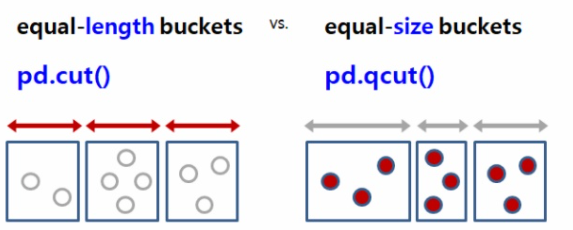

In [8]:
from IPython.display import Image, display
url_github_repo="https://github.com/EMbeDS-education/IPDPP-GSSI-20212022/raw/main/"
img=Image(url_github_repo+'jupyter/jupyterNotebooks/img/binning.png',width=500)
display(img)

In [36]:
import matplotlib.pyplot as plt #MATLAB-like plotting framework.

In [37]:
df_age = pd.DataFrame({'Age': np.random.normal(30, 2, 1000) })
df_age

Age
0    27.318657
1    29.002809
2    30.709860
3    30.614290
4    33.229833
..         ...
995  28.944518
996  29.954287
997  31.846286
998  29.202298
999  32.582129

[1000 rows x 1 columns]

Text(0, 0.5, 'Frequency')

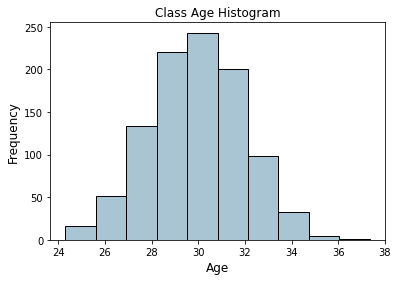

In [38]:
fig, ax = plt.subplots()
df_age['Age'].hist(bins=10, color='#A9C5D3', edgecolor='black', grid=False)
ax.set_title('Class Age Histogram', fontsize=12)
ax.set_xlabel('Age', fontsize=12)
ax.set_ylabel('Frequency', fontsize=12)

In [39]:
print("cut")
df_age['bucket_w'] = pd.cut(df_age.Age, 3) 
df_age['bucket_w'].value_counts()
print(df_age['bucket_w'].value_counts())# .plot(kind='bar')

print("\nqcut")
df_age['bucket_q'] = pd.qcut(df_age.Age, 3) 
print(df_age['bucket_q'].value_counts())# .plot(kind='bar')

cut
(28.652, 33.002]    670
(24.29, 28.652]     265
(33.002, 37.351]     65
Name: bucket_w, dtype: int64

qcut
(24.302, 29.12]     334
(29.12, 30.842]     333
(30.842, 37.351]    333
Name: bucket_q, dtype: int64


PhD Student    670
Student        265
Post-Doc        65
Name: bucket_q, dtype: int64


<AxesSubplot:>

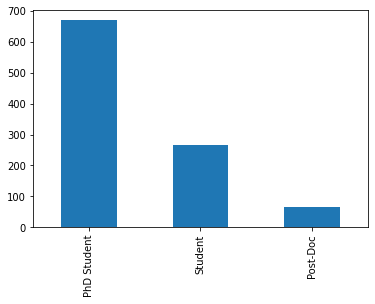

In [41]:
df_age['bucket_q'] = pd.cut(df_age.Age, 3,  labels=["Student", "PhD Student", "Post-Doc"]) 
print(df_age['bucket_q'].value_counts())# .plot(kind='bar')
df_age['bucket_q'].value_counts().plot(kind='bar')

In [42]:
df_age[['Age','bucket_q']].sort_values(by='Age')

Age  bucket_q
166  24.303341   Student
224  24.712081   Student
58   24.739503   Student
491  24.781153   Student
290  24.928976   Student
..         ...       ...
360  34.929990  Post-Doc
631  35.565467  Post-Doc
114  35.725029  Post-Doc
718  35.952687  Post-Doc
721  37.350583  Post-Doc

[1000 rows x 2 columns]

In [43]:
 pd.cut(df_age.Age, [10,20,30,40]).value_counts()

(30, 40]    501
(20, 30]    499
(10, 20]      0
Name: Age, dtype: int64

### Concatenate, Merge, Join
Sometimes we don't have just 1 dataframe, 
- but more that we want to combine in different ways

Pandas provides various facilities for easily combining together DataFrames

#### Concatenating Along an Axis
If we have dataframes representing _chunks_ of data with same structure 
- e.g., sets of rows of a table
- we can use `concat` to concatenate their rows
  - many more options [exist](https://pandas.pydata.org/pandas-docs/stable/user_guide/merging.html).

In [44]:
df1 = pd.DataFrame({'A': ['A0', 'A1', 'A2', 'A3'],
                    'B': ['B0', 'B1', 'B2', 'B3'],
                    'C': ['C0', 'C1', 'C2', 'C3'],
                    'D': ['D0', 'D1', 'D2', 'D3']},
                    index=[0, 1, 2, 3])
 
df2 = pd.DataFrame({'A': ['A4', 'A5', 'A6', 'A7'],
                    'B': ['B4', 'B5', 'B6', 'B7'],
                    'C': ['C4', 'C5', 'C6', 'C7'],
                    'D': ['D4', 'D5', 'D6', 'D7']},
                    index=[4, 5, 6, 7])


df3 = pd.DataFrame({'A': ['A8', 'A9', 'A10', 'A11'],
                    'B': ['B8', 'B9', 'B10', 'B11'],
                    'C': ['C8', 'C9', 'C10', 'C11'],
                    'D': ['D8', 'D9', 'D10', 'D11']},
                    index=[8, 9, 10, 11])
 

frames = [df1, df2, df3]

result = pd.concat(frames, axis=0)
result

A    B    C    D
0    A0   B0   C0   D0
1    A1   B1   C1   D1
2    A2   B2   C2   D2
3    A3   B3   C3   D3
4    A4   B4   C4   D4
5    A5   B5   C5   D5
6    A6   B6   C6   D6
7    A7   B7   C7   D7
8    A8   B8   C8   D8
9    A9   B9   C9   D9
10  A10  B10  C10  D10
11  A11  B11  C11  D11

Note, you might need to sort the resulting dataframe

In [45]:
frames = [df2, df1, df3]

result = pd.concat(frames, axis=0)
result

A    B    C    D
4    A4   B4   C4   D4
5    A5   B5   C5   D5
6    A6   B6   C6   D6
7    A7   B7   C7   D7
0    A0   B0   C0   D0
1    A1   B1   C1   D1
2    A2   B2   C2   D2
3    A3   B3   C3   D3
8    A8   B8   C8   D8
9    A9   B9   C9   D9
10  A10  B10  C10  D10
11  A11  B11  C11  D11

In [46]:
result.sort_index()

A    B    C    D
0    A0   B0   C0   D0
1    A1   B1   C1   D1
2    A2   B2   C2   D2
3    A3   B3   C3   D3
4    A4   B4   C4   D4
5    A5   B5   C5   D5
6    A6   B6   C6   D6
7    A7   B7   C7   D7
8    A8   B8   C8   D8
9    A9   B9   C9   D9
10  A10  B10  C10  D10
11  A11  B11  C11  D11

What if some rows have same index?
- You get more rows with same index! 

In [47]:
frames = [df2, df2]
result = pd.concat(frames, axis=0)
result

A   B   C   D
4  A4  B4  C4  D4
5  A5  B5  C5  D5
6  A6  B6  C6  D6
7  A7  B7  C7  D7
4  A4  B4  C4  D4
5  A5  B5  C5  D5
6  A6  B6  C6  D6
7  A7  B7  C7  D7

In [48]:
result.loc[4]

A   B   C   D
4  A4  B4  C4  D4
4  A4  B4  C4  D4

If you want to avoid this:
- Reset the index afterwards `result.reset_index()`
- Change the index of one of the two before concatenating

But, in general, we suggest to use `concat` only if this case does not arise.
> Indeed, it is useful to split first a big dtaframe, working on the single parts and putting them back together

In [55]:
result_reset=result.reset_index()
result_reset

index   A   B   C   D
0      4  A4  B4  C4  D4
1      5  A5  B5  C5  D5
2      6  A6  B6  C6  D6
3      7  A7  B7  C7  D7
4      4  A4  B4  C4  D4
5      5  A5  B5  C5  D5
6      6  A6  B6  C6  D6
7      7  A7  B7  C7  D7

You might also be interested in dropping duplicate rows (i.e., with same values apart from index)

In [57]:
result_reset.drop_duplicates()

index   A   B   C   D
0      4  A4  B4  C4  D4
1      5  A5  B5  C5  D5
2      6  A6  B6  C6  D6
3      7  A7  B7  C7  D7

Thanks to __data alignment__, you can also concatenate dataframe with 
- __not perfectly matching structure__

In [50]:
df2['E']= ['E8', 'E9', 'E10', 'E11']
df2.drop(['D'],axis=1,inplace=True,errors='ignore')
df2

A   B   C    E
4  A4  B4  C4   E8
5  A5  B5  C5   E9
6  A6  B6  C6  E10
7  A7  B7  C7  E11

In [107]:
frames = [df1, df2, df3]

result = pd.concat(frames, axis=0)
result

A    B    C    D    E
0    A0   B0   C0   D0  NaN
1    A1   B1   C1   D1  NaN
2    A2   B2   C2   D2  NaN
3    A3   B3   C3   D3  NaN
4    A4   B4   C4  NaN   E8
5    A5   B5   C5  NaN   E9
6    A6   B6   C6  NaN  E10
7    A7   B7   C7  NaN  E11
8    A8   B8   C8   D8  NaN
9    A9   B9   C9   D9  NaN
10  A10  B10  C10  D10  NaN
11  A11  B11  C11  D11  NaN

#### Database-style merging and joining

Dimensions in combining dataframes
- `concat` combines dataframes _vertically_
   - we put together _rows_
   - but we can also add columns specifying `axis`
- [`merge` and `join`](https://pandas.pydata.org/pandas-docs/stable/user_guide/merging.html) combine dataframes _horizontally_
   - we put together _columns_   
   
Some examples below were taken from [here](https://pandas.pydata.org/pandas-docs/stable/user_guide/merging.html)

##### Merge

`Merge` operations combine datasets by 
- Linking rows using one or more keys (i.e. columns).
- These operations are central to relational databases. 
  - After all, dataframes are tables ...

Let's look at an example of `merge`

In [51]:
left = pd.DataFrame({'key': ['K0', 'K1', 'K2', 'K3'],
                     'A': ['A0', 'A1', 'A2', 'A3'],
                     'B': ['B0', 'B1', 'B2', 'B3']})


right = pd.DataFrame({'key': ['K0', 'K0', 'K2', 'K2'],
                      'C': ['C0', 'C1', 'C2', 'C3'],
                      'D': ['D0', 'D1', 'D2', 'D3']})
left

key   A   B
0  K0  A0  B0
1  K1  A1  B1
2  K2  A2  B2
3  K3  A3  B3

In [52]:
right

key   C   D
0  K0  C0  D0
1  K0  C1  D1
2  K2  C2  D2
3  K2  C3  D3

We note that
- K0 and K2 appear in both dataframes
- K1 and K3 appear only in left

We want to obtain a dataframe with columns `key` and `A` to `D`, combining rows 
- with same value of `key`

In [53]:
pd.merge(left, right,  how='inner', on='key')

key   A   B   C   D
0  K0  A0  B0  C0  D0
1  K0  A0  B0  C1  D1
2  K2  A2  B2  C2  D2
3  K2  A2  B2  C3  D3

In [54]:
pd.merge(left, right,  how='outer', on='key')

key   A   B    C    D
0  K0  A0  B0   C0   D0
1  K0  A0  B0   C1   D1
2  K1  A1  B1  NaN  NaN
3  K2  A2  B2   C2   D2
4  K2  A2  B2   C3   D3
5  K3  A3  B3  NaN  NaN

In [114]:
pd.merge(left, right,  how='left', on='key')

key   A   B    C    D
0  K0  A0  B0   C0   D0
1  K0  A0  B0   C1   D1
2  K1  A1  B1  NaN  NaN
3  K2  A2  B2   C2   D2
4  K2  A2  B2   C3   D3
5  K3  A3  B3  NaN  NaN

- The _how_ argument determines which keys are to be included in the resulting table

|  Merge method |Description  |
|---|---|
|  left |  Use keys from left frame only |  
|  right |  Use keys from right frame only |  
|  outer |  Use union of keys from both frames |  
|  inner (default) | Use intersection of keys from both frames  |  


Instead, _on_ specifies the Column to join on. 
- This must appear in both combined DataFrames

What if you want to ignore certain columns? 

In [115]:
pd.merge(left, right,  how='inner', on='key')

key   A   B   C   D
0  K0  A0  B0  C0  D0
1  K0  A0  B0  C1  D1
2  K2  A2  B2  C2  D2
3  K2  A2  B2  C3  D3

In [116]:
right

key   C   D
0  K0  C0  D0
1  K0  C1  D1
2  K2  C2  D2
3  K2  C3  D3

In [117]:
pd.merge(left, right[['key','C']],  how='inner', on='key')

key   A   B   C
0  K0  A0  B0  C0
1  K0  A0  B0  C1
2  K2  A2  B2  C2
3  K2  A2  B2  C3

##### Join

Pandas exposes another method for applying merge-like operations
- **join**

Both `merge` and `join` are based on a common inner method.
- join could be useful in [specific cases](https://stackoverflow.com/questions/22676081/what-is-the-difference-between-join-and-merge-in-pandas)

# Load/manipulate remote CSV file: Simple application to Italian COVID data

In [57]:
import numpy as np
import pandas as pd 

Using Python and pandas, it is easy to read data from CSV files

One convenient feature is __type inference__
* You don’t need to specify which columns are numeric, integer, boolean, or string. 
* Handling dates and other custom types requires a bit more effort. 

Let us consider the national-level Italian COVID CSV data collected by Protezione civile
* It is distributed as a CSV file in a [GitHub repository](https://github.com/pcm-dpc/COVID-19/)
* You also find a local copy downloaded on 26/01/2021 in our wiki (follow the link dataset from the right-menu)

Let's read one such _remote_ CSV file into a DataFrame
* __You just need 1 instruction__

In [58]:
#Load delimited data from a file, URL, or file-like object. Use comma as default delimiter
covid_data = pd.read_csv('https://raw.githubusercontent.com/pcm-dpc/COVID-19/master/dati-andamento-nazionale/dpc-covid19-ita-andamento-nazionale.csv')

In [59]:
covid_data.head()

data stato  ricoverati_con_sintomi  terapia_intensiva  \
0  2020-02-24T18:00:00   ITA                     101                 26   
1  2020-02-25T18:00:00   ITA                     114                 35   
2  2020-02-26T18:00:00   ITA                     128                 36   
3  2020-02-27T18:00:00   ITA                     248                 56   
4  2020-02-28T18:00:00   ITA                     345                 64   

   totale_ospedalizzati  isolamento_domiciliare  totale_positivi  \
0                   127                      94              221   
1                   150                     162              311   
2                   164                     221              385   
3                   304                     284              588   
4                   409                     412              821   

   variazione_totale_positivi  nuovi_positivi  dimessi_guariti  ...  tamponi  \
0                           0             221                1  ...     4324   
1                          90              93                1  ...     8623   
2                          74              78                3  ...     9587   
3                         203             250               45  ...    12014   
4                         233             238               46  ...    15695   

   casi_testati  note  ingressi_terapia_intensiva  note_test  note_casi  \
0           NaN   NaN                         NaN        NaN        NaN   
1           NaN   NaN                         NaN        NaN        NaN   
2           NaN   NaN                         NaN        NaN        NaN   
3           NaN   NaN                         NaN        NaN        NaN   
4           NaN   NaN                         NaN        NaN        NaN   

  totale_positivi_test_molecolare  totale_positivi_test_antigenico_rapido  \
0                             NaN                                     NaN   
1                             NaN                                     NaN   
2                             NaN                                     NaN   
3                             NaN                                     NaN   
4                             NaN                                     NaN   

   tamponi_test_molecolare  tamponi_test_antigenico_rapido  
0                      NaN                             NaN  
1                      NaN                             NaN  
2                      NaN                             NaN  
3                      NaN                             NaN  
4                      NaN                             NaN  

[5 rows x 24 columns]

In [60]:
covid_data.tail()

data stato  ricoverati_con_sintomi  terapia_intensiva  \
734  2022-02-27T17:00:00   ITA                   10868                733   
735  2022-02-28T17:00:00   ITA                   10851                714   
736  2022-03-01T17:00:00   ITA                   10456                708   
737  2022-03-02T17:00:00   ITA                    9954                681   
738  2022-03-03T17:00:00   ITA                    9599                654   

     totale_ospedalizzati  isolamento_domiciliare  totale_positivi  \
734                 11601                 1110677          1122278   
735                 11565                 1088369          1099934   
736                 11164                 1062066          1073230   
737                 10635                 1050975          1061610   
738                 10253                 1031209          1041462   

     variazione_totale_positivi  nuovi_positivi  dimessi_guariti  ...  \
734                      -18280           30629         11487720  ...   
735                      -22344           17981         11528135  ...   
736                      -26704           46631         11601742  ...   
737                      -11620           36429         11651094  ...   
738                      -20148           41500         11713645  ...   

       tamponi  casi_testati  note  ingressi_terapia_intensiva  note_test  \
734  187137866    51411708.0   NaN                        26.0        NaN   
735  187336379    51449663.0   NaN                        39.0        NaN   
736  187867237    51541775.0   NaN                        74.0        NaN   
737  188282525    51627327.0   NaN                        40.0        NaN   
738  188713837    51712137.0   NaN                        52.0        NaN   

     note_casi totale_positivi_test_molecolare  \
734        NaN                       7915757.0   
735        NaN                       7949300.0   
736        NaN                       7959909.0   
737        NaN                       8032386.0   
738        NaN                       7980150.0   

     totale_positivi_test_antigenico_rapido  tamponi_test_molecolare  \
734                               4848801.0               85200886.0   
735                               4833536.0               85251765.0   
736                               4870063.0               85369378.0   
737                               4835532.0               85487020.0   
738                               4930356.0               85590680.0   

     tamponi_test_antigenico_rapido  
734                     101936980.0  
735                     102084614.0  
736                     102497859.0  
737                     102795505.0  
738                     103123157.0  

[5 rows x 24 columns]

In [61]:
covid_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 739 entries, 0 to 738
Data columns (total 24 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   data                                    739 non-null    object 
 1   stato                                   739 non-null    object 
 2   ricoverati_con_sintomi                  739 non-null    int64  
 3   terapia_intensiva                       739 non-null    int64  
 4   totale_ospedalizzati                    739 non-null    int64  
 5   isolamento_domiciliare                  739 non-null    int64  
 6   totale_positivi                         739 non-null    int64  
 7   variazione_totale_positivi              739 non-null    int64  
 8   nuovi_positivi                          739 non-null    int64  
 9   dimessi_guariti                         739 non-null    int64  
 10  deceduti                                739 non-null    int64 

In [62]:
covid_data.describe()

ricoverati_con_sintomi  terapia_intensiva  totale_ospedalizzati  \
count              739.000000         739.000000            739.000000   
mean             11705.930988        1332.151556          13038.083897   
std              10077.181704        1201.381270          11248.674483   
min                101.000000          26.000000            127.000000   
25%               2734.000000         338.000000           3060.500000   
50%               7707.000000         818.000000           8529.000000   
75%              20019.000000        2300.000000          22262.500000   
max              34697.000000        4068.000000          38507.000000   

       isolamento_domiciliare  totale_positivi  variazione_totale_positivi  \
count            7.390000e+02     7.390000e+02                  739.000000   
mean             3.556572e+05     3.686952e+05                 1408.986468   
std              5.367446e+05     5.417266e+05                22573.783703   
min              9.400000e+01     2.210000e+02              -116092.000000   
25%              4.776650e+04     5.508300e+04                -2513.000000   
50%              1.249580e+05     1.286960e+05                   48.000000   
75%              4.753070e+05     4.991980e+05                 2704.000000   
max              2.713594e+06     2.734906e+06               172462.000000   

       nuovi_positivi  dimessi_guariti       deceduti  \
count      739.000000     7.390000e+02     739.000000   
mean     17271.282815     2.641211e+06   85610.370771   
std      34354.579835     2.571030e+06   47498.167137   
min         78.000000     1.000000e+00       7.000000   
25%       1586.000000     2.064415e+05   35460.500000   
50%       5664.000000     2.398352e+06   97507.000000   
75%      16400.500000     4.268402e+06  129183.500000   
max     220532.000000     1.171364e+07  155399.000000   

       casi_da_sospetto_diagnostico  ...   totale_casi       tamponi  \
count                    162.000000  ...  7.390000e+02  7.390000e+02   
mean                  345928.216049  ...  3.095517e+06  5.414790e+07   
std                   217856.889628  ...  2.956466e+06  5.115178e+07   
min                        0.000000  ...  2.290000e+02  4.324000e+03   
25%                   223237.500000  ...  2.632445e+05  8.266433e+06   
50%                   236256.500000  ...  2.907825e+06  3.987586e+07   
75%                   341673.000000  ...  4.537245e+06  8.388190e+07   
max                   988470.000000  ...  1.291051e+07  1.887138e+08   

       casi_testati  ingressi_terapia_intensiva  note_test  note_casi  \
count  6.840000e+02                  456.000000        0.0        0.0   
mean   2.196460e+07                   95.807018        NaN        NaN   
std    1.449725e+07                   75.133332        NaN        NaN   
min    9.353100e+05                    2.000000        NaN        NaN   
25%    7.276669e+06                   30.750000        NaN        NaN   
50%    2.257261e+07                   75.500000        NaN        NaN   
75%    3.331711e+07                  151.000000        NaN        NaN   
max    5.171214e+07                  324.000000        NaN        NaN   

       totale_positivi_test_molecolare  \
count                     4.130000e+02   
mean                      4.490912e+06   
std                       1.354657e+06   
min                       2.351466e+06   
25%                       3.857606e+06   
50%                       4.241413e+06   
75%                       4.722639e+06   
max                       8.032386e+06   

       totale_positivi_test_antigenico_rapido  tamponi_test_molecolare  \
count                            4.130000e+02             4.130000e+02   
mean                             6.061112e+05             5.581533e+07   
std                              1.224157e+06             1.518863e+07   
min                              9.570000e+02             2.861735e+07   
25%                              1.372880e+05             4.479582e

In [63]:
covid_data['data']

0      2020-02-24T18:00:00
1      2020-02-25T18:00:00
2      2020-02-26T18:00:00
3      2020-02-27T18:00:00
4      2020-02-28T18:00:00
              ...         
734    2022-02-27T17:00:00
735    2022-02-28T17:00:00
736    2022-03-01T17:00:00
737    2022-03-02T17:00:00
738    2022-03-03T17:00:00
Name: data, Length: 739, dtype: object

In [64]:
covid_data.data

0      2020-02-24T18:00:00
1      2020-02-25T18:00:00
2      2020-02-26T18:00:00
3      2020-02-27T18:00:00
4      2020-02-28T18:00:00
              ...         
734    2022-02-27T17:00:00
735    2022-02-28T17:00:00
736    2022-03-01T17:00:00
737    2022-03-02T17:00:00
738    2022-03-03T17:00:00
Name: data, Length: 739, dtype: object

In [65]:
covid_data.iloc[0]

data                                      2020-02-24T18:00:00
stato                                                     ITA
ricoverati_con_sintomi                                    101
terapia_intensiva                                          26
totale_ospedalizzati                                      127
isolamento_domiciliare                                     94
totale_positivi                                           221
variazione_totale_positivi                                  0
nuovi_positivi                                            221
dimessi_guariti                                             1
deceduti                                                    7
casi_da_sospetto_diagnostico                              NaN
casi_da_screening                                         NaN
totale_casi                                               229
tamponi                                                  4324
casi_testati                                              NaN
note    

In [66]:
covid_data.iloc[-1]

data                                      2022-03-03T17:00:00
stato                                                     ITA
ricoverati_con_sintomi                                   9599
terapia_intensiva                                         654
totale_ospedalizzati                                    10253
isolamento_domiciliare                                1031209
totale_positivi                                       1041462
variazione_totale_positivi                             -20148
nuovi_positivi                                          41500
dimessi_guariti                                      11713645
deceduti                                               155399
casi_da_sospetto_diagnostico                              NaN
casi_da_screening                                         NaN
totale_casi                                          12910506
tamponi                                             188713837
casi_testati                                       51712137.0
note    

In [67]:
#Get the last day in the CSV file
last_day = covid_data['data'].iloc[-1]
last_day

'2022-03-03T17:00:00'

Using DataFrame’s to_csv method, we can write the data out to a comma-separated file
* Let's create a CSV file containing only the data about the latest day

In [68]:
print(covid_data.data == last_day) # Evaluates to True for the rows that satisfy this guard
cov_regions_last_day = covid_data[covid_data.data == last_day] # Get all the rows that satisfy the guard above
cov_regions_last_day

0      False
1      False
2      False
3      False
4      False
       ...  
734    False
735    False
736    False
737    False
738     True
Name: data, Length: 739, dtype: bool


data stato  ricoverati_con_sintomi  terapia_intensiva  \
738  2022-03-03T17:00:00   ITA                    9599                654   

     totale_ospedalizzati  isolamento_domiciliare  totale_positivi  \
738                 10253                 1031209          1041462   

     variazione_totale_positivi  nuovi_positivi  dimessi_guariti  ...  \
738                      -20148           41500         11713645  ...   

       tamponi  casi_testati  note  ingressi_terapia_intensiva  note_test  \
738  188713837    51712137.0   NaN                        52.0        NaN   

     note_casi totale_positivi_test_molecolare  \
738        NaN                       7980150.0   

     totale_positivi_test_antigenico_rapido  tamponi_test_molecolare  \
738                               4930356.0               85590680.0   

     tamponi_test_antigenico_rapido  
738                     103123157.0  

[1 rows x 24 columns]

In [69]:
cov_regions_last_day.to_csv('covid_lastday.csv')

Or, more compactly

In [70]:
covid_data[covid_data.data == covid_data['data'].iloc[-1]].to_csv('covid_lastday_b.csv')

In [71]:
covid_data[covid_data['ricoverati_con_sintomi'] > 10000].to_csv('covid_more_than_10k.csv')

In [72]:
covid_data[covid_data['ricoverati_con_sintomi'] > 25000].to_csv('covid_more_than_25k.csv')

# Plot dataframes: Simple application to Yahoo! Finance stock prices - %change, correlation
Let’s consider some DataFrames of stock prices obtained from
Yahoo! Finance:

In [73]:
# install Yahoo! Finance market data downloader for Pandas
%pip install -U pandas_datareader #convenient package for accessing online data (mostly finance-related)
%pip install matplotlib #'the' pyhton package for creating plots 
%pip install -U Jinja2 # Helps formatting strings with HTML and CSS.


#import sys 
#!"{sys.executable}" -m pip install -U pandas_datareader #convenient package for accessing online data (mostly finance-related)
# !{sys.executable} -m pip install matplotlib #'the' pyhton package for creating plots 
#!"{sys.executable}" -m pip install -U Jinja2 # Helps formatting strings with HTML and CSS.


import pandas_datareader.data as web

# Visualizzation libs
#keeps the plots in one place. calls image as static pngs
#%matplotlib inline 
import matplotlib.pyplot as plt #MATLAB-like plotting framework.

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 109.5/109.5 KB 2.2 MB/s eta 0:00:00a 0:00:01
  Using cached lxml-4.8.0-cp39-cp39-macosx_10_15_x86_64.whl (4.6 MB)
  Using cached requests-2.27.1-py2.py3-none-any.whl (63 kB)
  Using cached urllib3-1.26.8-py2.py3-none-any.whl (138 kB)
  Using cached certifi-2021.10.8-py2.py3-none-any.whl (149 kB)
  Using cached idna-3.3-py3-none-any.whl (61 kB)
  Using cached charset_normalizer-2.0.12-py3-none-any.whl (39 kB)
Note: you may need to restart the kernel to use updated packages.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.3/7.3 MB 10.1 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 10.0 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 895.5/895.5 KB 8.8 MB/s eta 0:00:00a 0:00:01
  Using cached packaging-21.3-py3-none-any.whl (40 kB)
  Using cached pyparsing-3.0.7-py3-none-any.whl (98 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.8/61.8 KB 2.1 MB/s eta 0:00:00
Note: you may need

Do you know dictionary comprehensions?

In [77]:
#https://finance.yahoo.com/quote/AAPL/history?period1=1467770400&period2=1625536799&interval=1d&frequency=1d&filter=history&guccounter=1&guce_referrer=aHR0cDovL2xvY2FsaG9zdDo4ODg4Lw&guce_referrer_sig=AQAAAByrNT-HvDMWtenDoAglNPRKNaphvEwT3rMevHGT-mKwGMlw5NvAj3GlaBn1ztprmTfT4vIDwdzHgXvFpe72e3ISW5I0FoYRmSqR1SzvVcwg8VmpqbFpYQn8lMZqSHSkhru9c3-fOHLDo5dWLBUiR9iqs0kLoNADVPIfhXtw72_x
all_data = {ticker: web.get_data_yahoo(ticker)
            for ticker in ['AAPL', 'IBM', 'MSFT', 'GOOG']}
all_data['AAPL']

High         Low        Open       Close      Volume  \
Date                                                                     
2017-03-06   34.942501   34.650002   34.842499   34.834999  87000000.0   
2017-03-07   34.994999   34.697498   34.764999   34.880001  69785200.0   
2017-03-08   34.950001   34.705002   34.737499   34.750000  74828800.0   
2017-03-09   34.697498   34.262501   34.685001   34.669998  88623600.0   
2017-03-10   34.840000   34.660000   34.812500   34.785000  78451200.0   
...                ...         ...         ...         ...         ...   
2022-02-25  165.119995  160.869995  163.839996  164.850006  91974200.0   
2022-02-28  165.419998  162.429993  163.059998  165.119995  94869100.0   
2022-03-01  166.600006  161.970001  164.699997  163.199997  83474400.0   
2022-03-02  167.360001  162.949997  164.389999  166.559998  79724800.0   
2022-03-03  168.910004  165.550003  168.470001  166.035004  64596205.0   

             Adj Close  
Date                    
2017-03-06   32.889805  
2017-03-07   32.932293  
2017-03-08   32.809563  
2017-03-09   32.734024  
2017-03-10   32.842598  
...                ...  
2022-02-25  164.850006  
2022-02-28  165.119995  
2022-03-01  163.199997  
2022-03-02  166.559998  
2022-03-03  166.035004  

[1259 rows x 6 columns]

Let us collect only the [_adjusted stock price_](https://www.investopedia.com/terms/a/adjusted_closing_price.asp) for each company

In [78]:
price = pd.DataFrame({ticker: data['Adj Close'] for ticker, data in all_data.items()})
price.head()

AAPL         IBM       MSFT        GOOG
Date                                                    
2017-03-06  32.889805  136.612656  59.995068  827.780029
2017-03-07  32.932293  136.544571  60.116417  831.909973
2017-03-08  32.809563  135.840561  60.667179  835.369995
2017-03-09  32.734024  134.122208  60.424473  838.679993
2017-03-10  32.842598  134.614273  60.611164  843.250000

In [79]:
price.tail()

AAPL         IBM        MSFT         GOOG
Date                                                       
2022-02-25  164.850006  124.180000  297.309998  2690.389893
2022-02-28  165.119995  122.510002  298.790009  2697.820068
2022-03-01  163.199997  121.349998  294.950012  2683.360107
2022-03-02  166.559998  123.860001  300.190002  2695.030029
2022-03-03  166.035004  125.950104  294.920013  2675.870117

Now, creating a simple plot of the dataframe takes only 1 line

<AxesSubplot:xlabel='Date'>

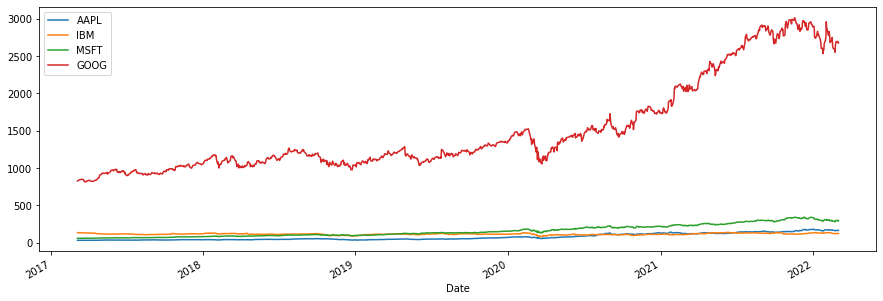

In [80]:
# plotting price dataframe. 
price.plot(figsize=(15,5))

In stock-markets, often one is interested in the _percent changes of the prices_
* % change from previous value

Let us compute it
- Actually, __let us ask Pandas to compute it__ for us!
- Method `pct_change()` does precisely this
  - Computes the percentage change from the immediately previous row by default. 
  - This is useful in comparing the percentage of change in a time series of elements.

In [81]:
returns = price.pct_change() 
returns.tail()

AAPL       IBM      MSFT      GOOG
Date                                              
2022-02-25  0.012965  0.018119  0.009233  0.013914
2022-02-28  0.001638 -0.013448  0.004978  0.002762
2022-03-01 -0.011628 -0.009469 -0.012852 -0.005360
2022-03-02  0.020588  0.020684  0.017766  0.004349
2022-03-03 -0.003152  0.016875 -0.017556 -0.007109

<AxesSubplot:xlabel='Date'>

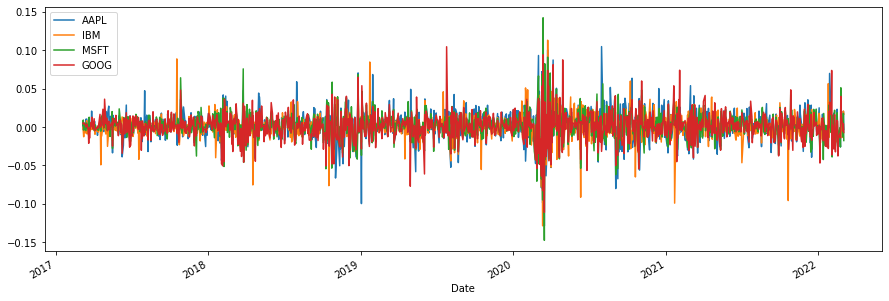

In [82]:
returns.plot(figsize=(15,5))

Can I smooth the data using moving averages/window averages?

In [83]:
returns_smooth=returns.rolling(15).mean()
returns_smooth

AAPL       IBM      MSFT      GOOG
Date                                              
2017-03-06       NaN       NaN       NaN       NaN
2017-03-07       NaN       NaN       NaN       NaN
2017-03-08       NaN       NaN       NaN       NaN
2017-03-09       NaN       NaN       NaN       NaN
2017-03-10       NaN       NaN       NaN       NaN
...              ...       ...       ...       ...
2022-02-25 -0.002963 -0.006045 -0.000502 -0.003698
2022-02-28 -0.002742 -0.006637 -0.001208 -0.003685
2022-03-01 -0.003234 -0.007312 -0.000977 -0.002141
2022-03-02 -0.003093 -0.005826 -0.000593 -0.001983
2022-03-03 -0.003856 -0.005076 -0.003219 -0.003530

[1259 rows x 4 columns]

<AxesSubplot:xlabel='Date'>

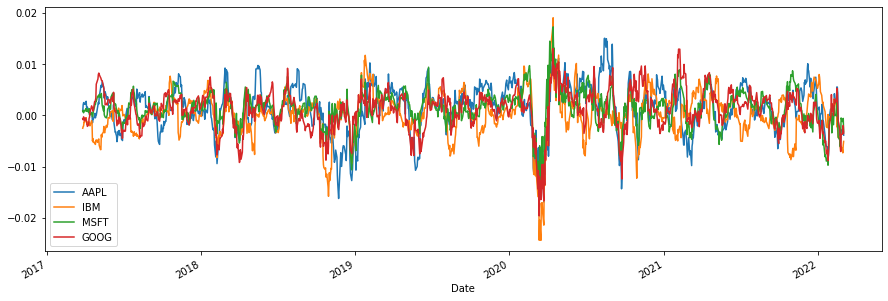

In [84]:
returns_smooth.plot(figsize=(15,5))

DataFrames offer two methods for computing 
* the correlation among the elements in the DataFrame (`corr`)
* the covariance matrix of the DataFrame (`cov`)

In [85]:
returns

AAPL       IBM      MSFT      GOOG
Date                                              
2017-03-06       NaN       NaN       NaN       NaN
2017-03-07  0.001292 -0.000498  0.002023  0.004989
2017-03-08 -0.003727 -0.005156  0.009162  0.004159
2017-03-09 -0.002302 -0.012650 -0.004001  0.003962
2017-03-10  0.003317  0.003669  0.003090  0.005449
...              ...       ...       ...       ...
2022-02-25  0.012965  0.018119  0.009233  0.013914
2022-02-28  0.001638 -0.013448  0.004978  0.002762
2022-03-01 -0.011628 -0.009469 -0.012852 -0.005360
2022-03-02  0.020588  0.020684  0.017766  0.004349
2022-03-03 -0.003152  0.016875 -0.017556 -0.007109

[1259 rows x 4 columns]

In [86]:
returns.corr()

AAPL       IBM      MSFT      GOOG
AAPL  1.000000  0.429166  0.743057  0.661988
IBM   0.429166  1.000000  0.482285  0.455975
MSFT  0.743057  0.482285  1.000000  0.782206
GOOG  0.661988  0.455975  0.782206  1.000000

In [87]:
returns.corr().style.background_gradient(cmap='Reds')

In [88]:
returns.cov()

AAPL       IBM      MSFT      GOOG
AAPL  0.000375  0.000139  0.000254  0.000224
IBM   0.000139  0.000280  0.000143  0.000133
MSFT  0.000254  0.000143  0.000312  0.000241
GOOG  0.000224  0.000133  0.000241  0.000304

In [89]:
returns.cov().style.background_gradient(cmap='Reds')

# More on plotting: More complex application to Italian COVID data
Pandas offers a number of plotting methods for DataFrame objects

In [134]:
#%pip install matplotlib

#import sys
#!"{sys.executable}" -m pip install matplotlib

The Italian Civil Protection Department publishes everyday [data on the status of the COVID-19 epidemy in Italy](https://github.com/pcm-dpc/COVID-19)

The repository contains trend data of the COVID'19 pandemic in Italy
- ‘dati-andamento-nazionale’ (national-level), 
- ‘dati-regioni’ (regional-level),
- ‘dati-province’ (province-level) 

In [90]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
#import warnings
#warnings.filterwarnings("ignore")

## Line Plots
Series and DataFrame each have a plot method for making many different types of plots
* By default, they make line plots 

Let's load again the national-level COVID'19 data
- We set the date (`data`) as the index column
- We tell pandas to interpret such column as a datetime type

In [91]:
# load data relating to the national trend of SARS-CoV-2 spread on Pandas DataFrame
url_dpc_nazionale = 'https://raw.githubusercontent.com/pcm-dpc/COVID-19/master/dati-andamento-nazionale/dpc-covid19-ita-andamento-nazionale.csv'
covid_italy = pd.read_csv(url_dpc_nazionale, index_col='data')
covid_italy.tail()

stato  ricoverati_con_sintomi  terapia_intensiva  \
data                                                                   
2022-02-27T17:00:00   ITA                   10868                733   
2022-02-28T17:00:00   ITA                   10851                714   
2022-03-01T17:00:00   ITA                   10456                708   
2022-03-02T17:00:00   ITA                    9954                681   
2022-03-03T17:00:00   ITA                    9599                654   

                     totale_ospedalizzati  isolamento_domiciliare  \
data                                                                
2022-02-27T17:00:00                 11601                 1110677   
2022-02-28T17:00:00                 11565                 1088369   
2022-03-01T17:00:00                 11164                 1062066   
2022-03-02T17:00:00                 10635                 1050975   
2022-03-03T17:00:00                 10253                 1031209   

                     totale_positivi  variazione_totale_positivi  \
data                                                               
2022-02-27T17:00:00          1122278                      -18280   
2022-02-28T17:00:00          1099934                      -22344   
2022-03-01T17:00:00          1073230                      -26704   
2022-03-02T17:00:00          1061610                      -11620   
2022-03-03T17:00:00          1041462                      -20148   

                     nuovi_positivi  dimessi_guariti  deceduti  ...  \
data                                                            ...   
2022-02-27T17:00:00           30629         11487720    154560  ...   
2022-02-28T17:00:00           17981         11528135    154767  ...   
2022-03-01T17:00:00           46631         11601742    155000  ...   
2022-03-02T17:00:00           36429         11651094    155214  ...   
2022-03-03T17:00:00           41500         11713645    155399  ...   

                       tamponi  casi_testati  note  \
data                                                 
2022-02-27T17:00:00  187137866    51411708.0   NaN   
2022-02-28T17:00:00  187336379    51449663.0   NaN   
2022-03-01T17:00:00  187867237    51541775.0   NaN   
2022-03-02T17:00:00  188282525    51627327.0   NaN   
2022-03-03T17:00:00  188713837    51712137.0   NaN   

                     ingressi_terapia_intensiva  note_test note_casi  \
data                                                                   
2022-02-27T17:00:00                        26.0        NaN       NaN   
2022-02-28T17:00:00                        39.0        NaN       NaN   
2022-03-01T17:00:00                        74.0        NaN       NaN   
2022-03-02T17:00:00                        40.0        NaN       NaN   
2022-03-03T17:00:00                        52.0        NaN       NaN   

                     totale_positivi_test_molecolare  \
data                                                   
2022-02-27T17:00:00                        7915757.0   
2022-02-28T17:00:00                        7949300.0   
2022-03-01T17:00:00                        7959909.0   
2022-03-02T17:00:00                        8032386.0   
2022-03-03T17:00:00                        7980150.0   

                     totale_positivi_test_antigenico_rapido  \
data                                                          
2022-02-27T17:00:00                               4848801.0   
2022-02-28T17:00:00                               4833536.0   
2022-03-01T17:00:00                               4870063.0   
2022-03-02T17:00:00                               4835532.0   
2022-03-03T17:00:00                               4930356.0   

                     tamponi_test_molecolare  tamponi_test_antigenico_rapido  
data                                                                          
2022-02-27T17:00:00               85200886.0                     101936980.0  
2022-02-28T17:00:00               85251765.0                     102084614.0  
2022-03-01T17:00:00  

Pandas considers the date as a string
- Let's tell to pands that it is a date
- This will allow us to reason in terms of time

In [92]:
print(covid_italy.index)
covid_italy.index = pd.to_datetime(covid_italy.index) # converts 'data' column from object to datatime type
#covid_italy.tail()
print()
print(covid_italy.index)

Index(['2020-02-24T18:00:00', '2020-02-25T18:00:00', '2020-02-26T18:00:00',
       '2020-02-27T18:00:00', '2020-02-28T18:00:00', '2020-02-29T18:00:00',
       '2020-03-01T18:00:00', '2020-03-02T18:00:00', '2020-03-03T18:00:00',
       '2020-03-04T18:00:00',
       ...
       '2022-02-22T17:00:00', '2022-02-23T17:00:00', '2022-02-24T17:00:00',
       '2022-02-25T17:00:00', '2022-02-26T17:00:00', '2022-02-27T17:00:00',
       '2022-02-28T17:00:00', '2022-03-01T17:00:00', '2022-03-02T17:00:00',
       '2022-03-03T17:00:00'],
      dtype='object', name='data', length=739)

DatetimeIndex(['2020-02-24 18:00:00', '2020-02-25 18:00:00',
               '2020-02-26 18:00:00', '2020-02-27 18:00:00',
               '2020-02-28 18:00:00', '2020-02-29 18:00:00',
               '2020-03-01 18:00:00', '2020-03-02 18:00:00',
               '2020-03-03 18:00:00', '2020-03-04 18:00:00',
               ...
               '2022-02-22 17:00:00', '2022-02-23 17:00:00',
               '2022-02-24 17:00:00', '

Let us focucs only on
- currently infected (`totale_positivi`)
- overall recovered (`dimessi_guariti`)
- overall deceased (`deceduti`)

In [93]:
covid_italy_filter = covid_italy[['totale_positivi','dimessi_guariti','deceduti' ]]
covid_italy_filter

totale_positivi  dimessi_guariti  deceduti
data                                                           
2020-02-24 18:00:00              221                1         7
2020-02-25 18:00:00              311                1        10
2020-02-26 18:00:00              385                3        12
2020-02-27 18:00:00              588               45        17
2020-02-28 18:00:00              821               46        21
...                              ...              ...       ...
2022-02-27 17:00:00          1122278         11487720    154560
2022-02-28 17:00:00          1099934         11528135    154767
2022-03-01 17:00:00          1073230         11601742    155000
2022-03-02 17:00:00          1061610         11651094    155214
2022-03-03 17:00:00          1041462         11713645    155399

[739 rows x 3 columns]

During the peek in Spring 2020, the Italian government made a number of urgent decrees (links in Italian)
- Decree "Zone Rosse"
  - Some areas were classified as _red zones_, i.e. put in lockdown
- Decree ["Io resto a casa"](https://www.agenziacoesione.gov.it/news_istituzionali/emergenza-epidemiologica-covid-19-fine-al-25-marzo-stop-alle-attivita-commerciali-al-dettaglio-in-tutta-italia-dpcm-11-marzo-2020/)
  - Only the _necessary_ industrial and commercial production activities were left open nation-wide
  - Not movements outside the city of residence
- Decree ["Chiudi Italia"](http://www.governo.it/it/articolo/coronavirus-firmato-il-dpcm-22-marzo-2020/14363)
  - Hard lockdown nation-wide
- Decree ["Fase 2"](http://www.salute.gov.it/portale/news/p3_2_1_1_1.jsp?lingua=italiano&menu=notizie&p=dalministero&id=4763)
  - Partial re-opening
  
Let us look at **how were the numbers at that time**

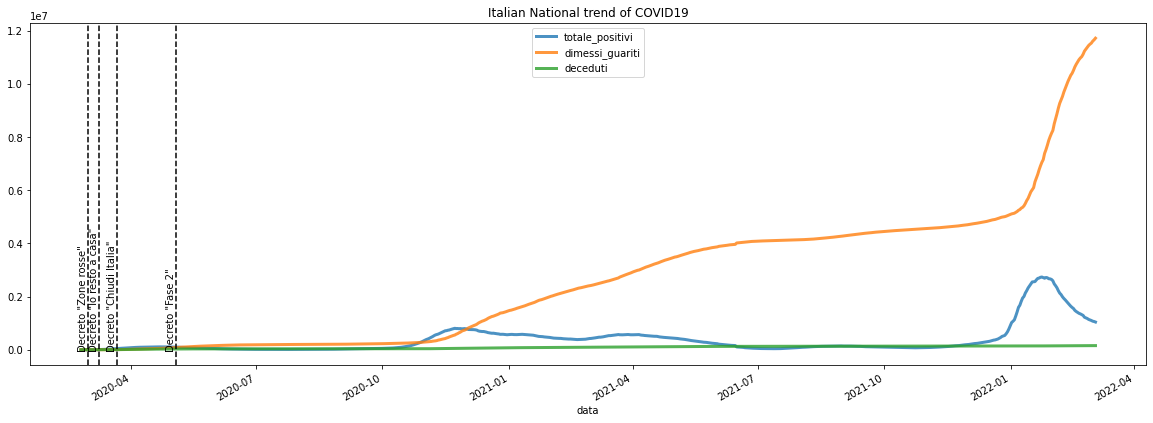

In [94]:
from datetime import datetime

# We now create the plot
covid_italy_filter.plot(figsize=(20, 7), linewidth=3, alpha=0.8, title="Italian National trend of COVID19") 

# and add annotations
annotations = {datetime(2020, 3, 1) :'Decreto "Zone rosse"',
               datetime(2020, 3, 9) :'Decreto "Io resto a casa"',
               datetime(2020, 3, 22):'Decreto "Chiudi Italia"',
               datetime(2020, 5, 4) :'Decreto "Fase 2"'}
 
for d,a in annotations.items():
    plt.annotate(a,(d, 0), rotation=90, horizontalalignment='right')
    plt.axvline(d, color='k', linestyle='--')   
    
plt.show()

We have too many data points 
- making it difficult to focus on the 4 dates of interest

Let's hide some
- using `iloc` to consider the first 100 rows
- using `loc` to consider the rows with date before June
- using `drop` to drop the rows from June onward

But first, let's create a function to add annotations to the _current_ plot

In [95]:
def add_annotations():
    # and add annotations
    annotations = {datetime(2020, 3, 1) :'Decreto "Zone rosse"',
                   datetime(2020, 3, 9) :'Decreto "Io resto a casa"',
                   datetime(2020, 3, 22):'Decreto "Chiudi Italia"',
                   datetime(2020, 5, 4) :'Decreto "Fase 2"'}
 
    for d,a in annotations.items():
        plt.annotate(a,(d, 0), rotation=90, horizontalalignment='right')
        plt.axvline(d, color='k', linestyle='--')   

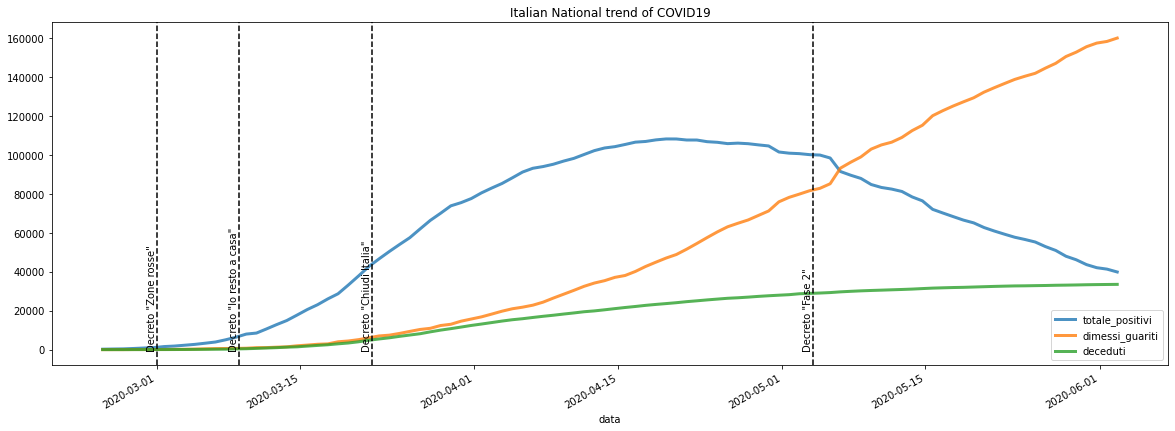

In [96]:
covid_italy_filter.iloc[:100].plot(figsize=(20, 7), linewidth=3, alpha=0.8, title="Italian National trend of COVID19") 
add_annotations() 
plt.show()

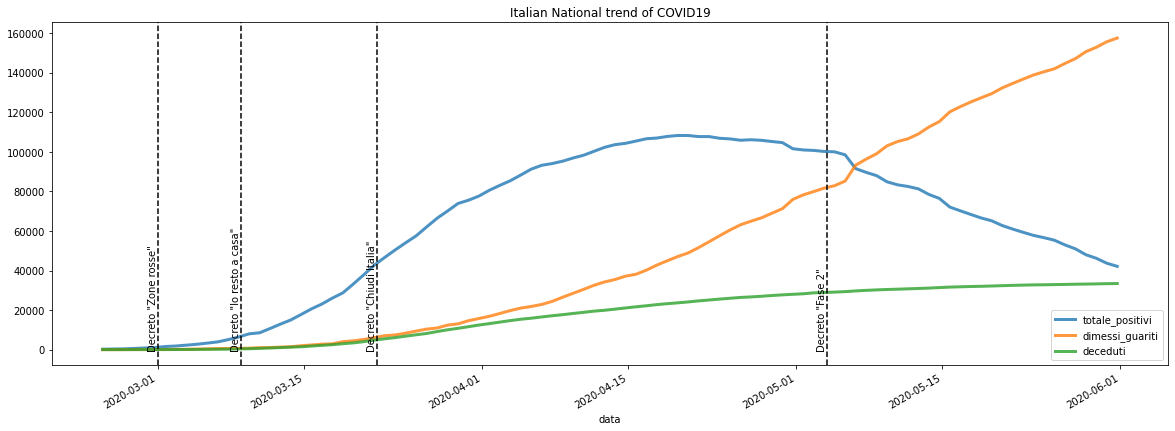

In [97]:
covid_italy_filter.loc[covid_italy_filter.index<= datetime(2020, 6, 1)].plot(figsize=(20, 7), linewidth=3, alpha=0.8, title="Italian National trend of COVID19") 
add_annotations()     
plt.show()

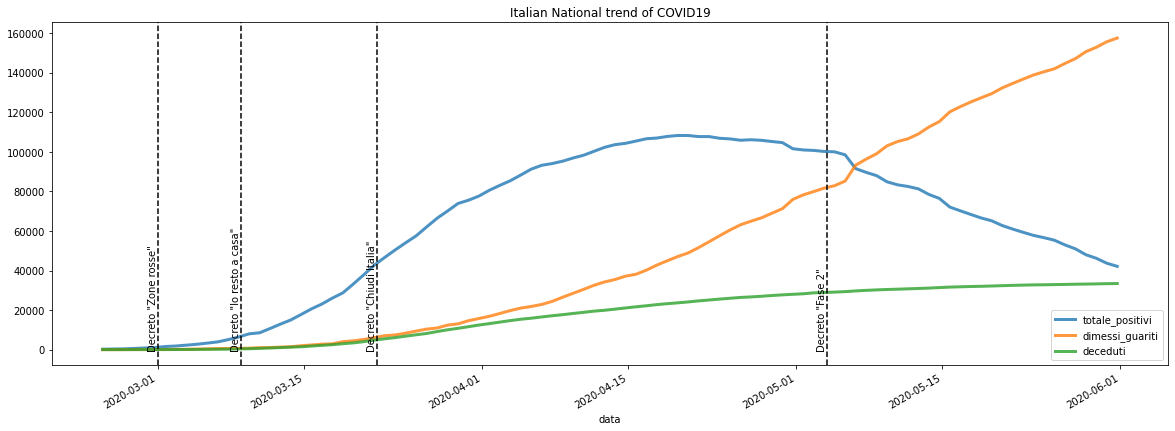

In [98]:
covid_italy_filter.drop(covid_italy_filter[covid_italy_filter.index > datetime(2020, 6, 1)].index).plot(figsize=(20, 7), linewidth=3, alpha=0.8, title="Italian National trend of COVID19") 
add_annotations()     
plt.show()

What about recent months?

<AxesSubplot:title={'center':'Since end of 2021'}, xlabel='data'>

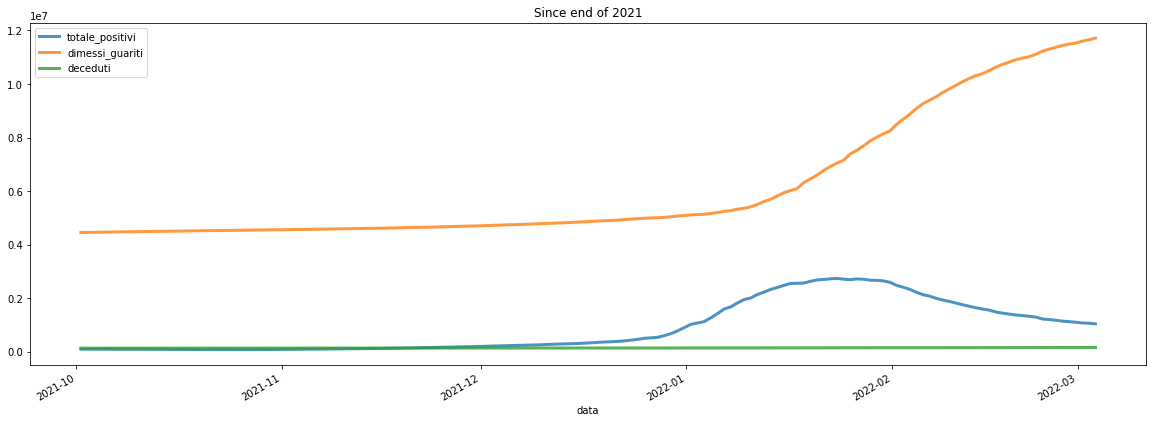

In [99]:
covid_italy_filter.loc[covid_italy_filter.index>= datetime(2021, 10, 1)].plot(figsize=(20, 7), linewidth=3, alpha=0.8, title="Since end of 2021") 



## Bar Plots
Making bar plots instead of line plots is as simple as passing 
* `kind='bar'` (for vertical bars) or 
* `kind='barh'` (for horizontal bars).

<AxesSubplot:title={'center':' Deceduti vs Positivi updated at 03/03/22'}, xlabel='regione'>

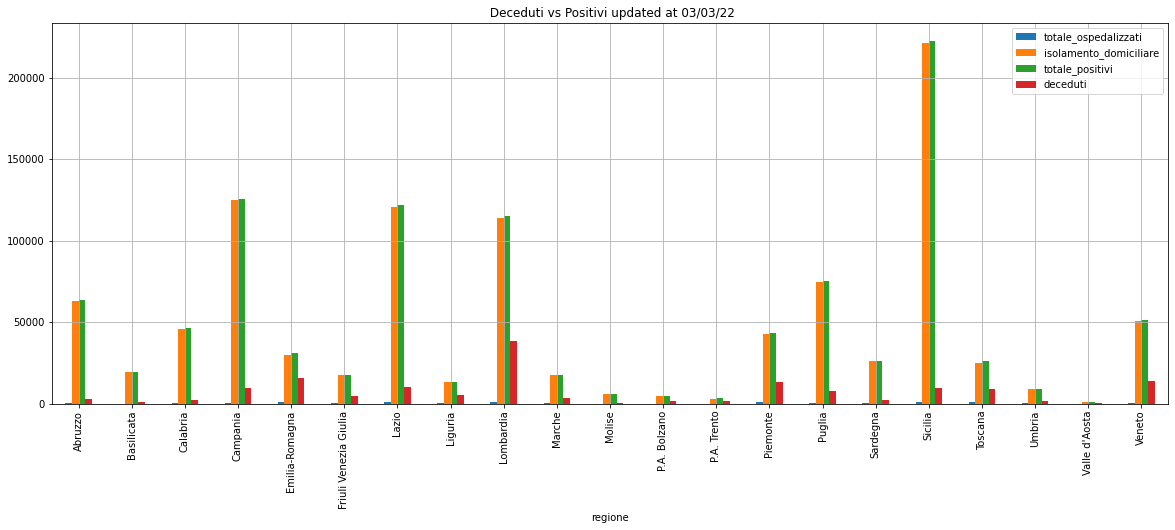

In [100]:
# load data relating to the regional trend of SARS-CoV-2 spread
url_dpc_regioni = 'https://raw.githubusercontent.com/pcm-dpc/COVID-19/master/dati-regioni/dpc-covid19-ita-regioni.csv'
covid_regions = pd.read_csv(url_dpc_regioni)
covid_regions.index = pd.to_datetime(covid_regions.data)
covid_regions = covid_regions.rename(columns={'denominazione_regione': 'regione'})

# get last day data
cov_regions_last_day = covid_regions[covid_regions.data ==  covid_regions.data.iloc[-1]] # get last day data
cov_regions_last_day.index = cov_regions_last_day.regione # set Region as index

#drop some unnecessary columns
cov_regions_last_day = cov_regions_last_day.drop(['lat','long','codice_regione',"stato","regione","note"], axis = 1)

#Let's get the data of interest (Deceduti vs Positivi) and plot them
title = f" Deceduti vs Positivi updated at {covid_regions.index[-1].strftime('%D')}"
#Here we are using 'bar!'
cov_regions_last_day[['totale_ospedalizzati','isolamento_domiciliare','totale_positivi','deceduti']].plot(kind='bar', figsize =(20,7),grid=True,title=title)

#plt.show()

In [101]:
cov_regions_last_day[['totale_ospedalizzati','isolamento_domiciliare','totale_positivi','deceduti']]

totale_ospedalizzati  isolamento_domiciliare  \
regione                                                               
Abruzzo                                 337                   63203   
Basilicata                               94                   19437   
Calabria                                289                   45981   
Campania                                682                  125030   
Emilia-Romagna                         1298                   29868   
Friuli Venezia Giulia                   196                   17707   
Lazio                                  1328                  120832   
Liguria                                 296                   13008   
Lombardia                              1041                  113891   
Marche                                  202                   17510   
Molise                                   29                    5848   
P.A. Bolzano                             67                    4709   
P.A. Trento                              50                    3134   
Piemonte                                834                   42535   
Puglia                                  615                   74890   
Sardegna                                347                   25958   
Sicilia                                1034                  221374   
Toscana                                 796                   25232   
Umbria                                  152                    9117   
Valle d'Aosta                            20                    1262   
Veneto                                  546                   50683   

                       totale_positivi  deceduti  
regione                                           
Abruzzo                          63540      2975  
Basilicata                       19531       768  
Calabria                         46270      2110  
Campania                        125712      9803  
Emilia-Romagna                   31166     15959  
Friuli Venezia Giulia            17903      4793  
Lazio                           122160     10468  
Liguria                          13304      5122  
Lombardia                       114932     38689  
Marche                           17712      3604  
Molise                            5877       570  
P.A. Bolzano                      4776      1413  
P.A. Trento                       3184      1522  
Piemonte                         43369     13073  
Puglia                           75505      7699  
Sardegna                         26305      2070  
Sicilia                         222408      9552  
Toscana                          26028      9082  
Umbria                            9269      1742  
Valle d'Aosta                     1282       521  
Veneto                           51229     13864

### Stacked bar plots
Stacked bar plots are created from a DataFrame by passing `stacked=True`, 
- resulting in the value in each row being stacked together

Let's compare 'terapia_intensiva' and 'totale_ospedalizzati' on latest day

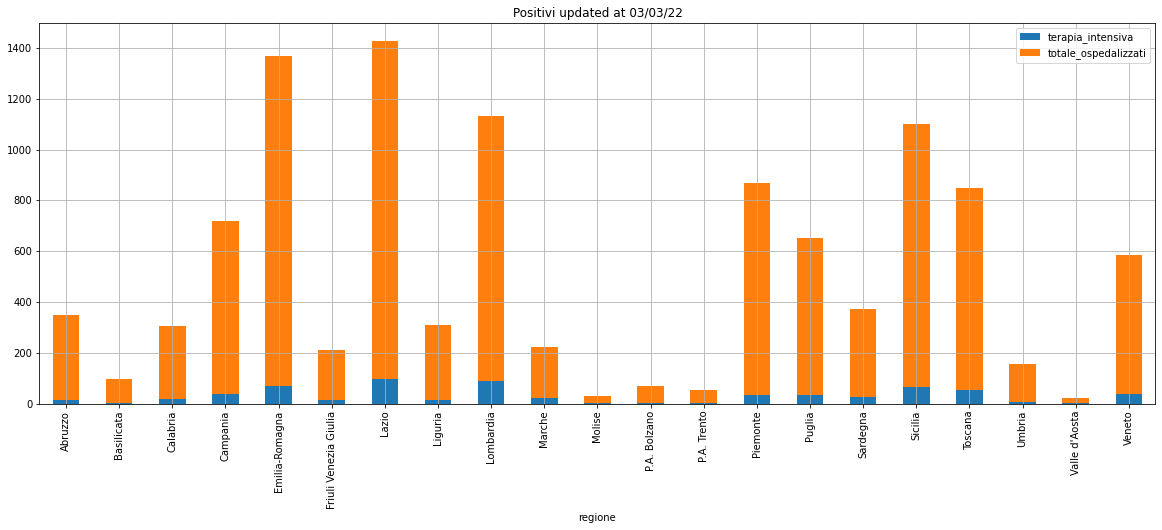

In [102]:
title = f"Positivi updated at {covid_regions.index[-1].strftime('%D')}"
cov_regions_last_day[['terapia_intensiva','totale_ospedalizzati']].plot(kind='bar', stacked=True, figsize =(20,7),grid=True,title=title)
plt.show()

## Scatter Matrix 
In exploratory data analysis it is helpful to look at how pairs of variables relate to each other
* we are interested in _plots relating pairs of variables_
* this is known as a _pairs plot_ or _scatter plot matrix_. 

Making such a plot from scratch requires a bit of work. 
* Luckily pandas has a `scatter_matrix` function for creating one from a DataFrame. 
* It also supports placing histograms or density plots of each variable along the diagonal.

In [103]:
covid_italy = pd.read_csv(url_dpc_nazionale, index_col='data')
covid_italy.index = pd.to_datetime(covid_italy.index) # converts 'data' column from object to datatime type
covid_italy.tail()

stato  ricoverati_con_sintomi  terapia_intensiva  \
data                                                                   
2022-02-27 17:00:00   ITA                   10868                733   
2022-02-28 17:00:00   ITA                   10851                714   
2022-03-01 17:00:00   ITA                   10456                708   
2022-03-02 17:00:00   ITA                    9954                681   
2022-03-03 17:00:00   ITA                    9599                654   

                     totale_ospedalizzati  isolamento_domiciliare  \
data                                                                
2022-02-27 17:00:00                 11601                 1110677   
2022-02-28 17:00:00                 11565                 1088369   
2022-03-01 17:00:00                 11164                 1062066   
2022-03-02 17:00:00                 10635                 1050975   
2022-03-03 17:00:00                 10253                 1031209   

                     totale_positivi  variazione_totale_positivi  \
data                                                               
2022-02-27 17:00:00          1122278                      -18280   
2022-02-28 17:00:00          1099934                      -22344   
2022-03-01 17:00:00          1073230                      -26704   
2022-03-02 17:00:00          1061610                      -11620   
2022-03-03 17:00:00          1041462                      -20148   

                     nuovi_positivi  dimessi_guariti  deceduti  ...  \
data                                                            ...   
2022-02-27 17:00:00           30629         11487720    154560  ...   
2022-02-28 17:00:00           17981         11528135    154767  ...   
2022-03-01 17:00:00           46631         11601742    155000  ...   
2022-03-02 17:00:00           36429         11651094    155214  ...   
2022-03-03 17:00:00           41500         11713645    155399  ...   

                       tamponi  casi_testati  note  \
data                                                 
2022-02-27 17:00:00  187137866    51411708.0   NaN   
2022-02-28 17:00:00  187336379    51449663.0   NaN   
2022-03-01 17:00:00  187867237    51541775.0   NaN   
2022-03-02 17:00:00  188282525    51627327.0   NaN   
2022-03-03 17:00:00  188713837    51712137.0   NaN   

                     ingressi_terapia_intensiva  note_test note_casi  \
data                                                                   
2022-02-27 17:00:00                        26.0        NaN       NaN   
2022-02-28 17:00:00                        39.0        NaN       NaN   
2022-03-01 17:00:00                        74.0        NaN       NaN   
2022-03-02 17:00:00                        40.0        NaN       NaN   
2022-03-03 17:00:00                        52.0        NaN       NaN   

                     totale_positivi_test_molecolare  \
data                                                   
2022-02-27 17:00:00                        7915757.0   
2022-02-28 17:00:00                        7949300.0   
2022-03-01 17:00:00                        7959909.0   
2022-03-02 17:00:00                        8032386.0   
2022-03-03 17:00:00                        7980150.0   

                     totale_positivi_test_antigenico_rapido  \
data                                                          
2022-02-27 17:00:00                               4848801.0   
2022-02-28 17:00:00                               4833536.0   
2022-03-01 17:00:00                               4870063.0   
2022-03-02 17:00:00                               4835532.0   
2022-03-03 17:00:00                               4930356.0   

                     tamponi_test_molecolare  tamponi_test_antigenico_rapido  
data                                                                          
2022-02-27 17:00:00               85200886.0                     101936980.0  
2022-02-28 17:00:00               85251765.0                     102084614.0  
2022-03-01 17:00:00  

In [104]:
#drop unnecessary columns
covid_italy.drop(columns=["note_test","note_casi"], inplace=True)

In [105]:
covid_italy['totale_casi']

data
2020-02-24 18:00:00         229
2020-02-25 18:00:00         322
2020-02-26 18:00:00         400
2020-02-27 18:00:00         650
2020-02-28 18:00:00         888
                         ...   
2022-02-27 17:00:00    12764558
2022-02-28 17:00:00    12782836
2022-03-01 17:00:00    12829972
2022-03-02 17:00:00    12867918
2022-03-03 17:00:00    12910506
Name: totale_casi, Length: 739, dtype: int64

In [106]:
covid_italy['terapia_intensiva']

data
2020-02-24 18:00:00     26
2020-02-25 18:00:00     35
2020-02-26 18:00:00     36
2020-02-27 18:00:00     56
2020-02-28 18:00:00     64
                      ... 
2022-02-27 17:00:00    733
2022-02-28 17:00:00    714
2022-03-01 17:00:00    708
2022-03-02 17:00:00    681
2022-03-03 17:00:00    654
Name: terapia_intensiva, Length: 739, dtype: int64

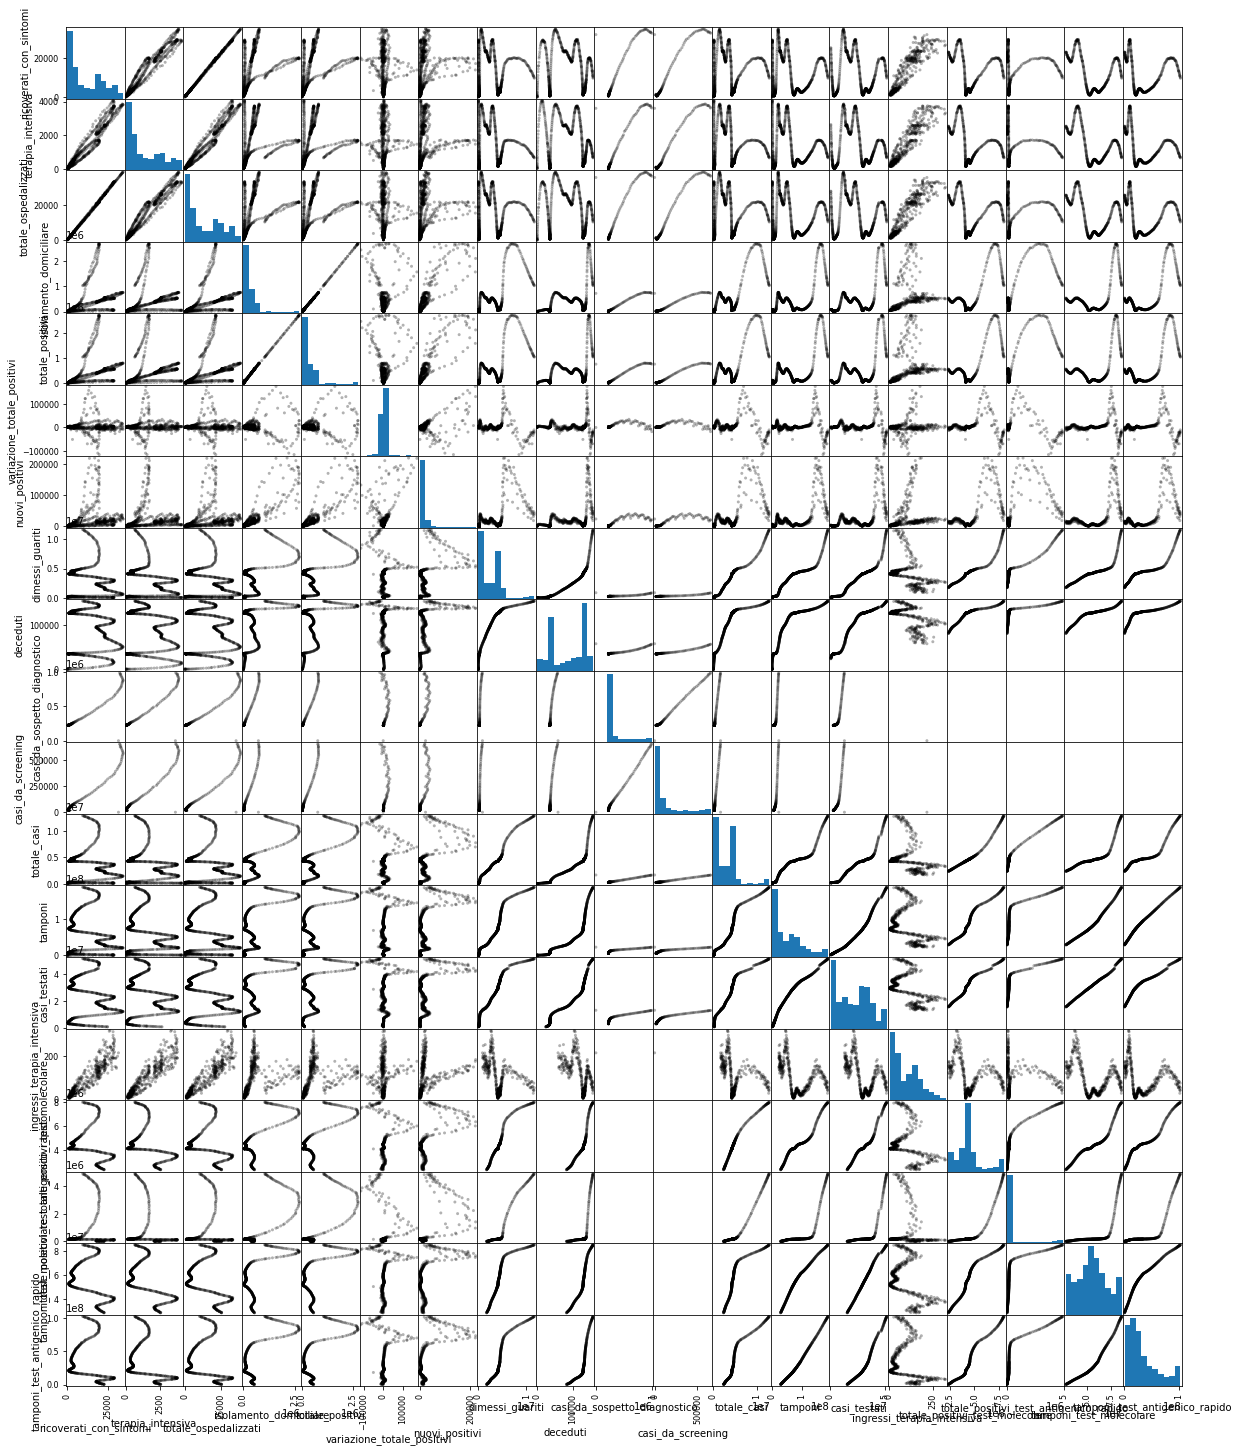

In [107]:
pd.plotting.scatter_matrix(covid_italy,figsize =(20,25),  color='k', alpha=0.3)
plt.show()

Too much data here!
- let's remove some more mostly empty rows

In [108]:
covid_italy[["totale_positivi_test_molecolare","totale_positivi_test_antigenico_rapido","tamponi_test_molecolare","tamponi_test_antigenico_rapido"]]

totale_positivi_test_molecolare  \
data                                                   
2020-02-24 18:00:00                              NaN   
2020-02-25 18:00:00                              NaN   
2020-02-26 18:00:00                              NaN   
2020-02-27 18:00:00                              NaN   
2020-02-28 18:00:00                              NaN   
...                                              ...   
2022-02-27 17:00:00                        7915757.0   
2022-02-28 17:00:00                        7949300.0   
2022-03-01 17:00:00                        7959909.0   
2022-03-02 17:00:00                        8032386.0   
2022-03-03 17:00:00                        7980150.0   

                     totale_positivi_test_antigenico_rapido  \
data                                                          
2020-02-24 18:00:00                                     NaN   
2020-02-25 18:00:00                                     NaN   
2020-02-26 18:00:00                                     NaN   
2020-02-27 18:00:00                                     NaN   
2020-02-28 18:00:00                                     NaN   
...                                                     ...   
2022-02-27 17:00:00                               4848801.0   
2022-02-28 17:00:00                               4833536.0   
2022-03-01 17:00:00                               4870063.0   
2022-03-02 17:00:00                               4835532.0   
2022-03-03 17:00:00                               4930356.0   

                     tamponi_test_molecolare  tamponi_test_antigenico_rapido  
data                                                                          
2020-02-24 18:00:00                      NaN                             NaN  
2020-02-25 18:00:00                      NaN                             NaN  
2020-02-26 18:00:00                      NaN                             NaN  
2020-02-27 18:00:00                      NaN                             NaN  
2020-02-28 18:00:00                      NaN                             NaN  
...                                      ...                             ...  
2022-02-27 17:00:00               85200886.0                     101936980.0  
2022-02-28 17:00:00               85251765.0                     102084614.0  
2022-03-01 17:00:00               85369378.0                     102497859.0  
2022-03-02 17:00:00               85487020.0                     102795505.0  
2022-03-03 17:00:00               85590680.0                     103123157.0  

[739 rows x 4 columns]

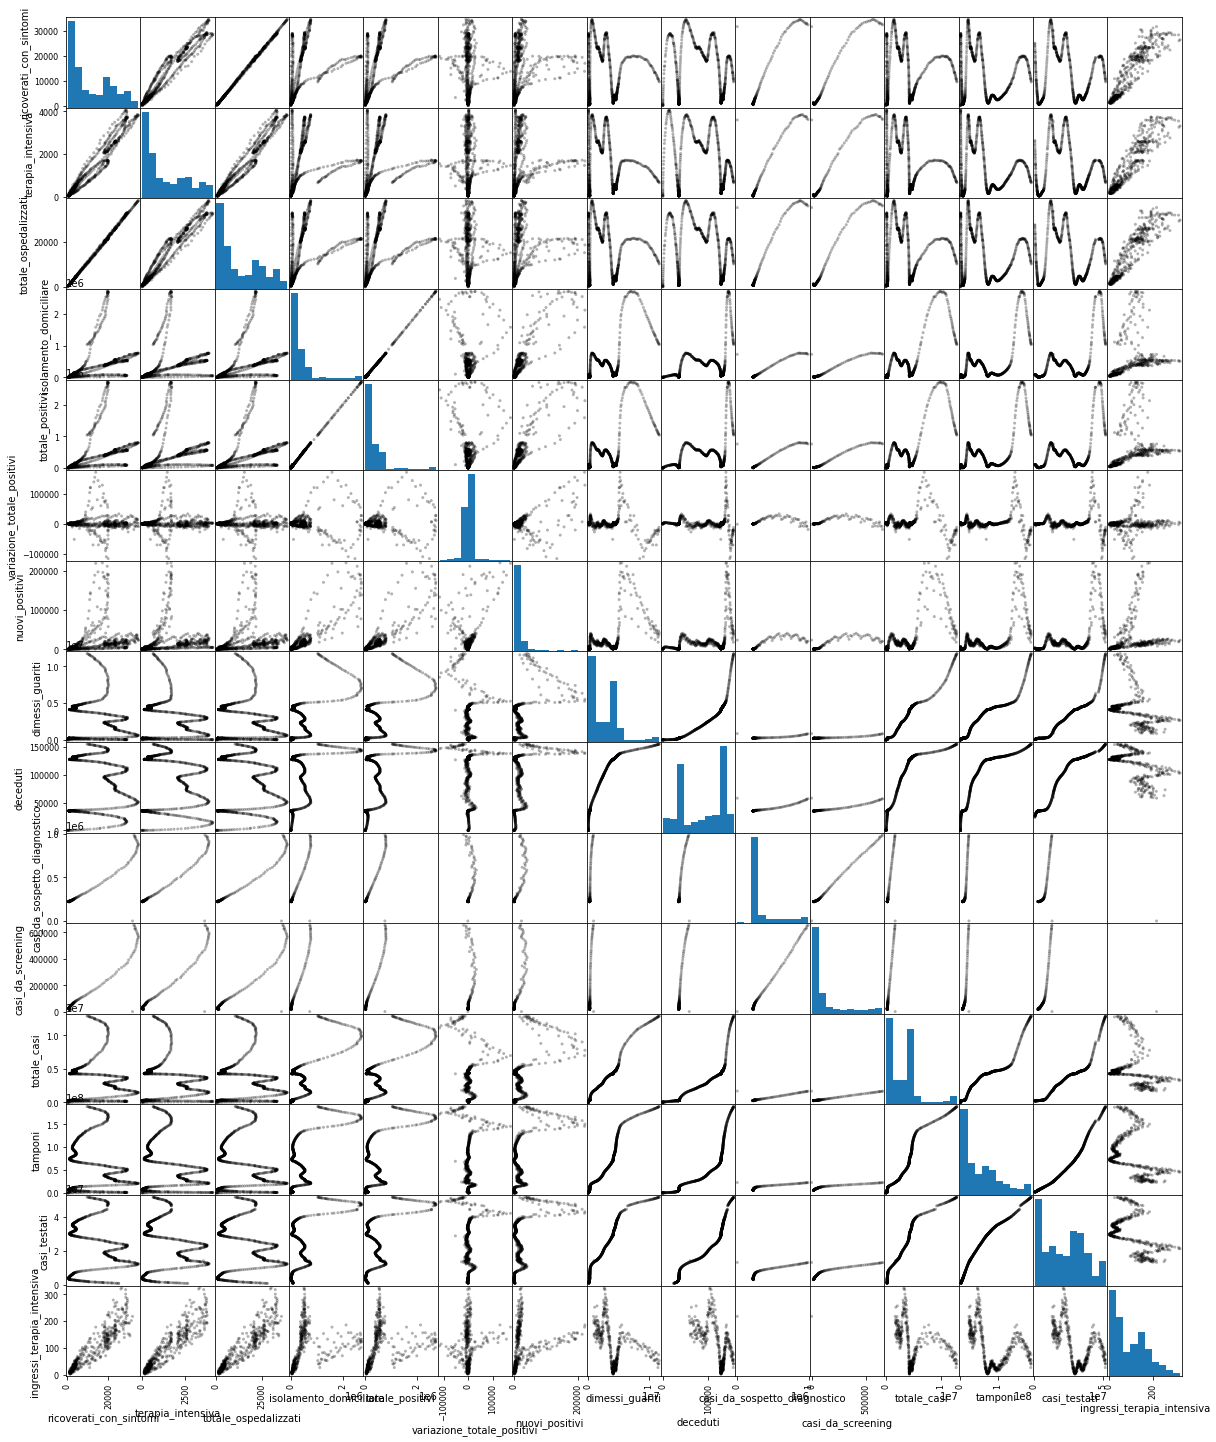

In [109]:
covid_italy.drop(columns=["totale_positivi_test_molecolare","totale_positivi_test_antigenico_rapido","tamponi_test_molecolare","tamponi_test_antigenico_rapido"], inplace=True)
pd.plotting.scatter_matrix(covid_italy,figsize =(20,25),  color='k', alpha=0.3)
plt.show()